##### Rationale:
- Machine learning may be useful to characterize cardiovascular risk, predict outcomes, and identify biomarkers in population studies.

##### Objective
- Obesity is a complicated illness with its own debilitating characteristics, pathophysiologies, and comorbidities. Increased BMI is a risk factor for noncommunicable illnesses such as diabetes, cardiovascular disease, and musculoskeletal problems, resulting in a significant loss in life quality and expectancy.The key findings of the data from NHANES in 2015-2016 stated that The overall prevalence of obesity was higher among non-Hispanic black and Hispanic adults than among non-Hispanic white and non-Hispanic Asian adults. The same pattern was seen among the youth. 
- Here we develop machine learning classification models to identify the most contributing risk factors in estimating levels of obesity. 
- We are also interested in knowing which features associated with eating habits, physical condition or physiological charateristics are critical in predicting the obesity levels in the Hispanic population
- To test the ability of several classification models, to predict several categories of obesity levels.
- Estimate effect sizes of robust risk factors and their associations with obesity levels utilizing general linear models 

##### Data
- This data  is for the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition. Data was collected using a web platform with a survey (see Table 1) where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records, after a balancing process described in Fig. 1, Fig. 2. The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS), other variables obtained were: Gender, Age, Height and Weight. Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity. The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.


##### Skills Employed:
- Exploratory Data Analysis
- Data Cleaning and Preprocessing
- Data Visualization
- Feature Selection and Balancing of Data
- Machine Learning 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data Examination and Exploration

In [2]:
df = pd.read_csv("obesity_estimation_data.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC), (Yes, No)
- Frequency of consumption of vegetables (FCVC), (Never, Sometimes, Always)
- Number of main meals (NCP), (1 to 2 , 3 , More than 3)
- Consumption of food between meals (CAEC), (No, Sometimes, Frequently, Always)
- Consumption of water daily (CH20), and 
- Consumption of alcohol (CALC). 

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC), 
- Physical activity frequency (FAF), 
- Time using technology devices (TUE), 
- Transportation used (MTRANS), 

Other variables obtained were: Gender, Age, Height and Weight. 

Finally, all data was labeled and the class variable NObesity was created with the values of: 
- Insufficient Weight, 
- Normal Weight,
- Overweight Level I, 
- Overweight Level II, 
- Obesity Type I, 
- Obesity Type II and 
- Obesity Type III, 
- and information from WHO and Mexican Normativity

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Data Visualization and Preprocessing
### Univariate and Multivariate exploratory analysis
- Numeric features

In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [7]:
df_num.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

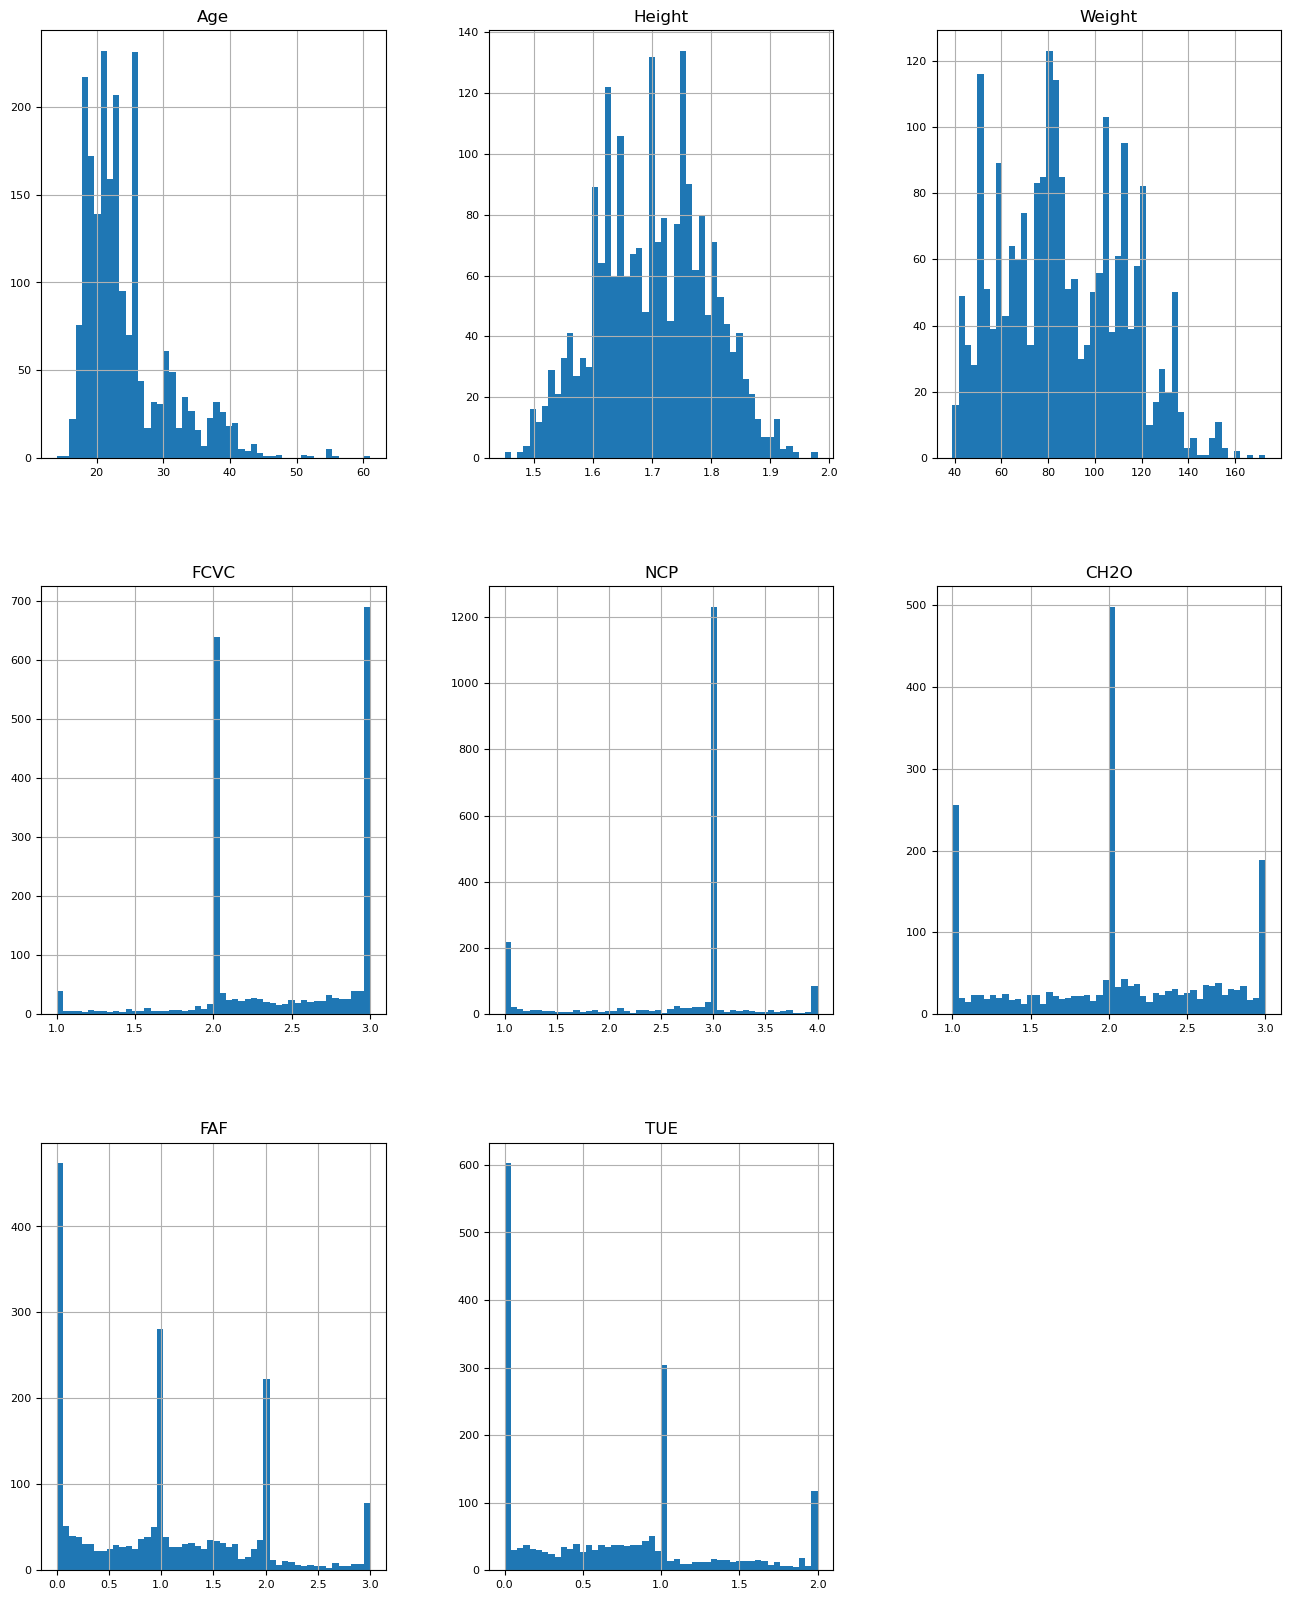

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

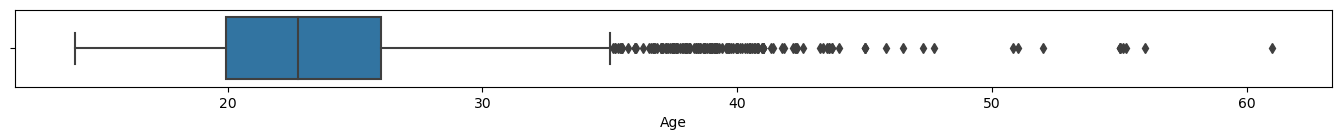

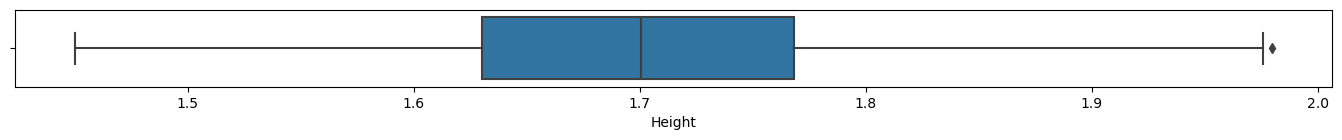

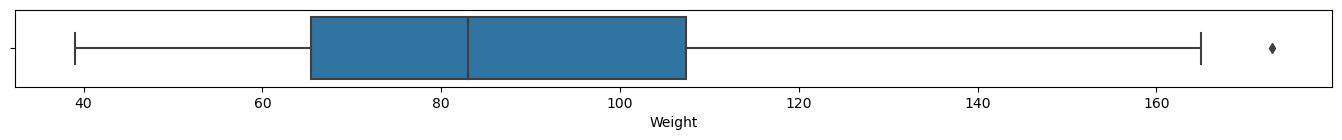

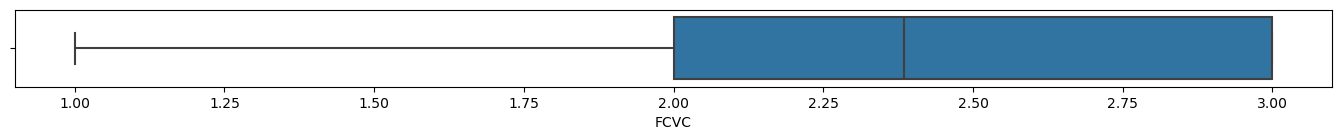

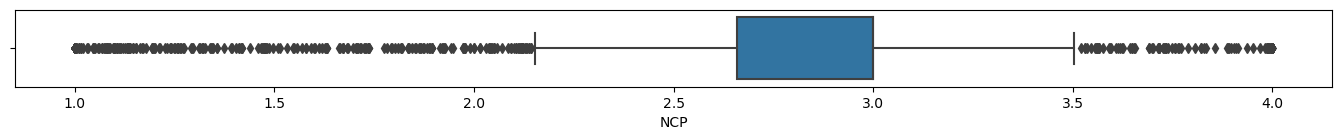

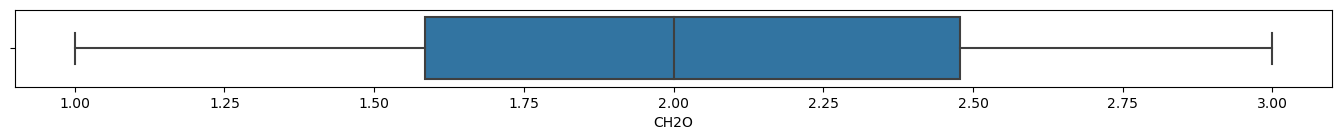

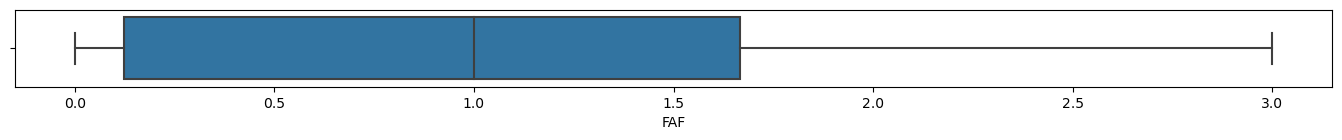

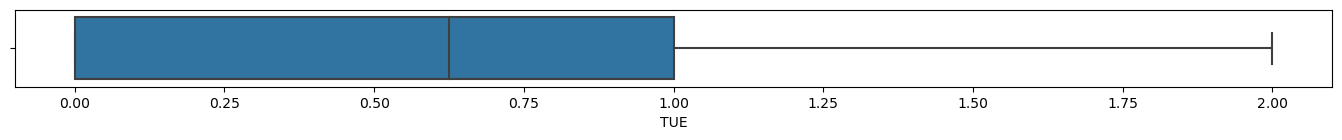

In [9]:
for column in df_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_num, x=column)

In [10]:
df_num['FCVC'].value_counts()

3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64

In [11]:
df_num['NCP'].value_counts()

3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: NCP, Length: 635, dtype: int64

In [12]:
df_num['CH2O'].value_counts()

2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: CH2O, Length: 1268, dtype: int64

In [13]:
df_num['FAF'].value_counts()

0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: FAF, Length: 1190, dtype: int64

 - From the data, we see that the ordinal categorical variables which should hold discrete values do have some continuous numeric integer values
 - Hence we will delete rows from dataframe where values are continuous for the following attributes (FCVC, NCO, CH2O, FAF)
 - The attributes mentioned above are float type instead of being object type that should take on discrete values

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
print(X)

[['Female' 21.0 1.62 ... 1.0 'no' 'Public_Transportation']
 ['Female' 21.0 1.52 ... 0.0 'Sometimes' 'Public_Transportation']
 ['Male' 23.0 1.8 ... 1.0 'Frequently' 'Public_Transportation']
 ...
 ['Female' 22.524036 1.752206 ... 0.646288 'Sometimes'
  'Public_Transportation']
 ['Female' 24.361936 1.73945 ... 0.586035 'Sometimes'
  'Public_Transportation']
 ['Female' 23.664709 1.738836 ... 0.714137 'Sometimes'
  'Public_Transportation']]


In [16]:
print(y)

['Normal_Weight' 'Normal_Weight' 'Normal_Weight' ... 'Obesity_Type_III'
 'Obesity_Type_III' 'Obesity_Type_III']


 - Ordinal categories (ordinal encoding)
 - Norminal Catgories (one hot encoding)

In [17]:
ordinal_categories = df[['FCVC', 'NCP', 'CAEC', 'CH2O', 'CAEC' , 'FAF', 'TUE' , 'MTRANS']]

In [18]:
ordinal_categories

,FCVC,NCP,CAEC,CH2O,CAEC,FAF,TUE,MTRANS
0,2.0,3.0,Sometimes,2.000000,Sometimes,0.000000,1.000000,Public_Transportation
1,3.0,3.0,Sometimes,3.000000,Sometimes,3.000000,0.000000,Public_Transportation
2,2.0,3.0,Sometimes,2.000000,Sometimes,2.000000,1.000000,Public_Transportation
3,3.0,3.0,Sometimes,2.000000,Sometimes,2.000000,0.000000,Walking
4,2.0,1.0,Sometimes,2.000000,Sometimes,0.000000,0.000000,Public_Transportation
...,...,...,...,...,...,...,...,...
2106,3.0,3.0,Sometimes,1.728139,Sometimes,1.676269,0.906247,Public_Transportation
2107,3.0,3.0,Sometimes,2.005130,Sometimes,1.341390,0.599270,Public_Transportation
2108,3.0,3.0,Sometimes,2.054193,Sometimes,1.414209,0.646288,Public_Transportation
2109,3.0,3.0,Sometimes,2.852339,Sometimes,1.139107,0.586035,Public_Transportation


In [19]:
norminal_categories = df[['Gender', 'family_history_with_overweight', 'FAVC' ,'SCC']]

In [20]:
norminal_categories

,Gender,family_history_with_overweight,FAVC,SCC
0,Female,yes,no,no
1,Female,yes,no,yes
2,Male,yes,no,no
3,Male,no,no,no
4,Male,no,no,no
...,...,...,...,...
2106,Female,yes,yes,no
2107,Female,yes,yes,no
2108,Female,yes,yes,no
2109,Female,yes,yes,no


In [21]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Delete rows from dataframe where values are continuous for the following attributes (FCVC, NCO, CH2O, FAF) independently and merge them on id column

In [22]:
#Create an id column for df
df['id'] = range(1, len(df) + 1)

In [23]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,id
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,1
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,2
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,3
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,4
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,2107
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,2108
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,2109
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,2110


In [24]:
col_name="id"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)

In [25]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
df_FCVC = df[['id' , 'FCVC']]

In [27]:
df_FCVC = df_FCVC[df_FCVC['FCVC'].isin([1, 2 , 3])]
df_FCVC.head()

,id,FCVC
0,1,2.0
1,2,3.0
2,3,2.0
3,4,3.0
4,5,2.0


In [28]:
df_FCVC['FCVC'].value_counts()

3.0    652
2.0    600
1.0     33
Name: FCVC, dtype: int64

In [29]:
df_NCP = df[['id' , 'NCP']]

In [30]:
df_NCP = df_NCP[df_NCP['NCP'].isin([1, 2 , 3])]
df_NCP.head()

,id,NCP
0,1,3.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,1.0


In [31]:
df_NCP['NCP'].value_counts()

3.0    1203
1.0     199
Name: NCP, dtype: int64

In [32]:
df_CH2O = df[['id' , 'CH2O']]

In [33]:
df_CH2O = df_CH2O[df_CH2O['CH2O'].isin([1, 2 , 3])]
df_CH2O.head()

,id,CH2O
0,1,2.0
1,2,3.0
2,3,2.0
3,4,2.0
4,5,2.0


In [34]:
df_CH2O['CH2O'].value_counts()

2.0    448
1.0    211
3.0    162
Name: CH2O, dtype: int64

In [35]:
df_FAF = df[['id' , 'FAF']]

In [36]:
df_FAF = df_FAF[df_FAF['FAF'].isin([0, 1, 2 , 3])]
df_FAF.head()

,id,FAF
0,1,0.0
1,2,3.0
2,3,2.0
3,4,2.0
4,5,0.0


In [37]:
df_FAF['FAF'].value_counts()

0.0    411
1.0    234
2.0    183
3.0     75
Name: FAF, dtype: int64

In [38]:
df_TUE = df[['id' , 'TUE']]

In [39]:
df_TUE = df_TUE[df_TUE['TUE'].isin([0, 1, 2])]
df_TUE.head()

,id,TUE
0,1,1.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,0.0


In [40]:
df_TUE['TUE'].value_counts()

0.0    557
1.0    292
2.0    109
Name: TUE, dtype: int64

In [41]:
#Drop columns (FCVC, NCO, CH2O, FAF) from df
df_2 = df.drop(['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], axis=1)

In [42]:
df_2.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


- Now merge df_FCVC , df_NCP ,df_CH2O, df_FAF, df_TUE together on id
- Then merge together with df_2 on id

In [43]:
df_FCVC.shape

(1285, 2)

In [44]:
df_NCP.shape

(1402, 2)

In [45]:
df_CH2O.shape

(821, 2)

In [46]:
df_FAF.shape

(903, 2)

In [47]:
df_TUE.shape

(958, 2)

In [48]:
merged_df_1 = df_FCVC.merge(df_NCP, how='inner', on="id")

In [49]:
merged_df_1.shape

(1023, 3)

In [50]:
merged_df_2 = merged_df_1.merge(df_CH2O, how='inner' , on ='id') 

In [51]:
merged_df_2.shape

(560, 4)

In [52]:
merged_df_3 = merged_df_2.merge(df_FAF, how='inner' , on ='id') 

In [53]:
merged_df_3.shape

(495, 5)

In [54]:
merged_df_4 = merged_df_3.merge(df_TUE, how='inner' , on ='id') 

In [55]:
merged_df_4.shape

(483, 6)

In [56]:
merged_df_4.head()

,id,FCVC,NCP,CH2O,FAF,TUE
0,1,2.0,3.0,2.0,0.0,1.0
1,2,3.0,3.0,3.0,3.0,0.0
2,3,2.0,3.0,2.0,2.0,1.0
3,4,3.0,3.0,2.0,2.0,0.0
4,5,2.0,1.0,2.0,0.0,0.0


In [57]:
df_3 = df_2.merge(merged_df_4, how='inner' , on ='id') 

In [58]:
df_3.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE
0,1,Female,21.0,1.62,64.0,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,2.0,3.0,2.0,0.0,1.0
1,2,Female,21.0,1.52,56.0,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,3.0,3.0,3.0,3.0,0.0
2,3,Male,23.0,1.80,77.0,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,2.0,3.0,2.0,2.0,1.0
3,4,Male,27.0,1.80,87.0,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,3.0,3.0,2.0,2.0,0.0
4,5,Male,22.0,1.78,89.8,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,2.0,1.0,2.0,0.0,0.0


In [59]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 482
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              483 non-null    int64  
 1   Gender                          483 non-null    object 
 2   Age                             483 non-null    float64
 3   Height                          483 non-null    float64
 4   Weight                          483 non-null    float64
 5   family_history_with_overweight  483 non-null    object 
 6   FAVC                            483 non-null    object 
 7   CAEC                            483 non-null    object 
 8   SMOKE                           483 non-null    object 
 9   SCC                             483 non-null    object 
 10  CALC                            483 non-null    object 
 11  MTRANS                          483 non-null    object 
 12  NObeyesdad                      483 

In [60]:
df_3.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,297.385093,23.538901,1.681958,70.466685,2.306418,2.486542,1.937888,1.130435,0.658385
std,241.002937,7.103478,0.097234,17.240320,0.577321,0.874563,0.699936,1.027407,0.735346
min,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,137.500000,19.000000,1.615000,58.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,261.000000,21.000000,1.670000,69.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,398.000000,24.500000,1.750000,80.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,1440.000000,61.000000,1.980000,173.000000,3.000000,3.000000,3.000000,3.000000,2.000000


In [61]:
df_3['FCVC'].value_counts()

2.0    277
3.0    177
1.0     29
Name: FCVC, dtype: int64

In [62]:
df_3['NCP'].value_counts()

3.0    359
1.0    124
Name: NCP, dtype: int64

In [63]:
df_3['CH2O'].value_counts()

2.0    245
1.0    134
3.0    104
Name: CH2O, dtype: int64

In [64]:
df_3['FAF'].value_counts()

1.0    164
0.0    161
2.0     92
3.0     66
Name: FAF, dtype: int64

In [65]:
df_3['TUE'].value_counts()

0.0    241
1.0    166
2.0     76
Name: TUE, dtype: int64

In [66]:
df['NObeyesdad'].value_counts() # target value distribution in oringinal data set

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [67]:
df_3['NObeyesdad'].value_counts() # target value distribution in preprocessed data set

Normal_Weight          258
Overweight_Level_I      65
Overweight_Level_II     59
Obesity_Type_I          58
Insufficient_Weight     30
Obesity_Type_II         10
Obesity_Type_III         3
Name: NObeyesdad, dtype: int64

In [68]:
df_3_num = df_3.select_dtypes(include = ['float64', 'int64'])
df_3_num.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,2,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,3,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,4,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,5,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

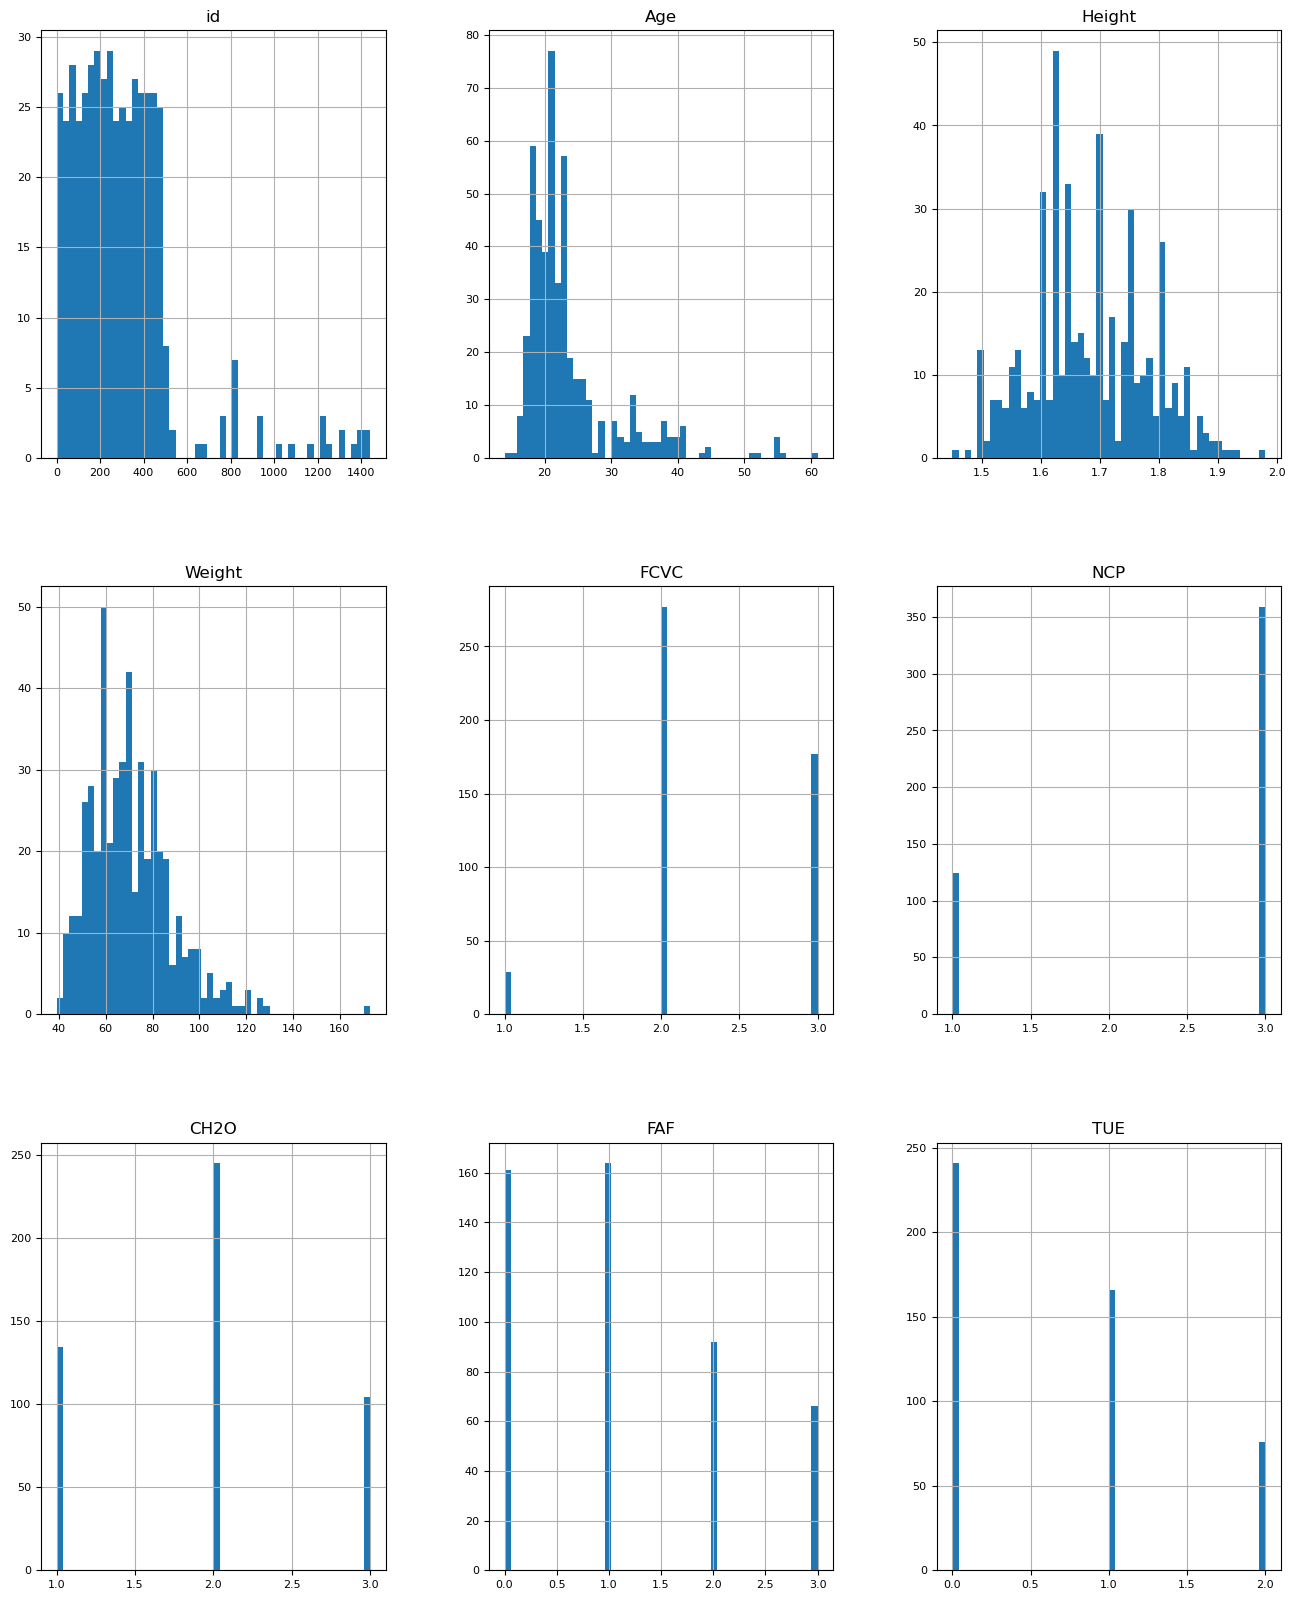

In [69]:
df_3_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

- Remove outliers from dataframe df 3

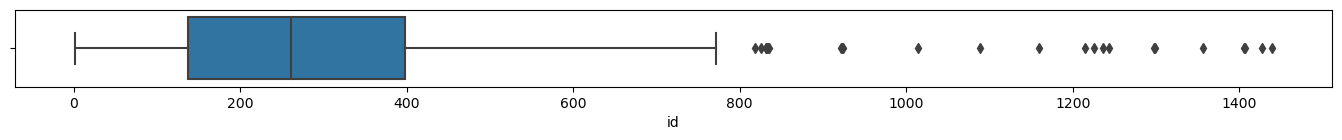

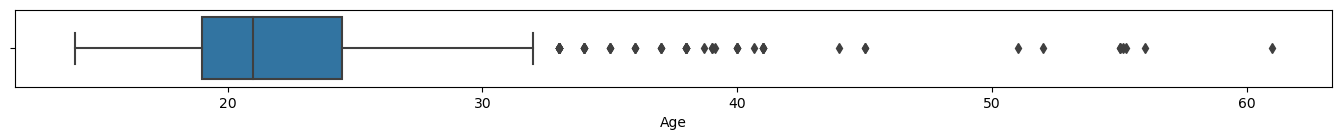

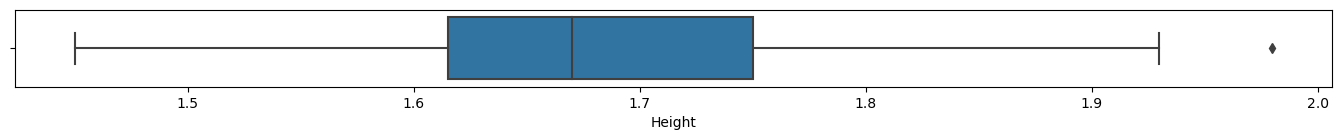

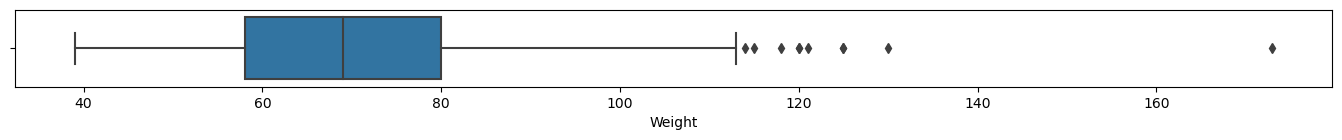

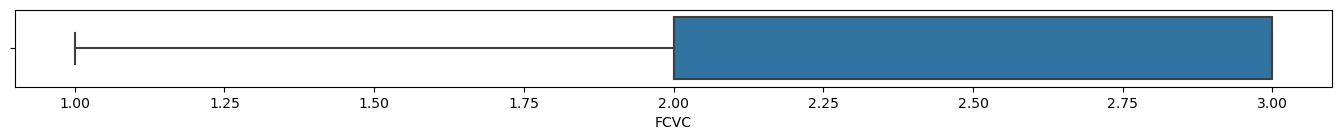

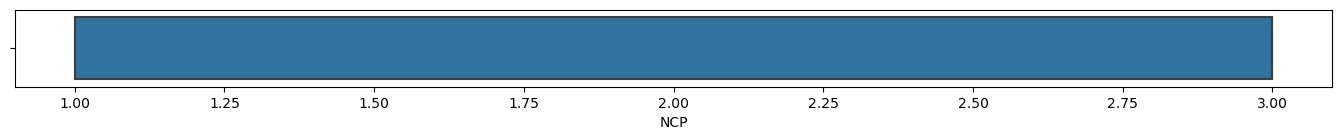

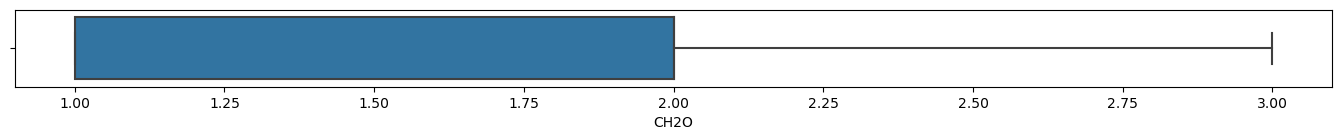

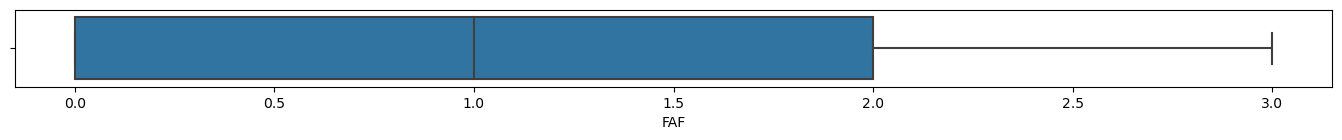

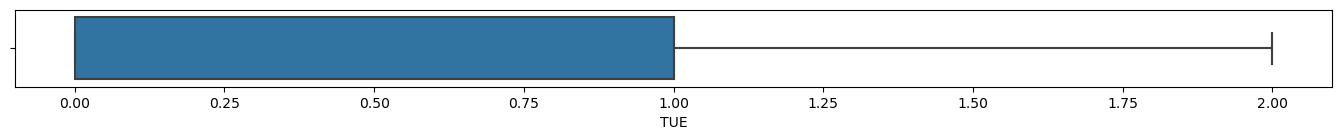

In [70]:
for column in df_3_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_3_num, x=column)

### Data Cleaning

In [71]:
def outliers(df, ft):
        
     Q1 = df[ft].quantile(0.25)
     Q3 = df[ft].quantile(0.75)
     IQR = Q3 - Q1
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
     return ls

In [72]:
index_list = []

for feature in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:

    index_list.extend(outliers(df_3,feature))

In [73]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [74]:
df_3_nooutliers = remove(df_3, index_list)

In [75]:
df_3_nooutliers.shape

(416, 18)

In [76]:
df_3.shape

(483, 18)

In [77]:
df_3_nooutliers_num = df_3_nooutliers.select_dtypes(include = ['float64', 'int64'])

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>]],
      dtype=object)

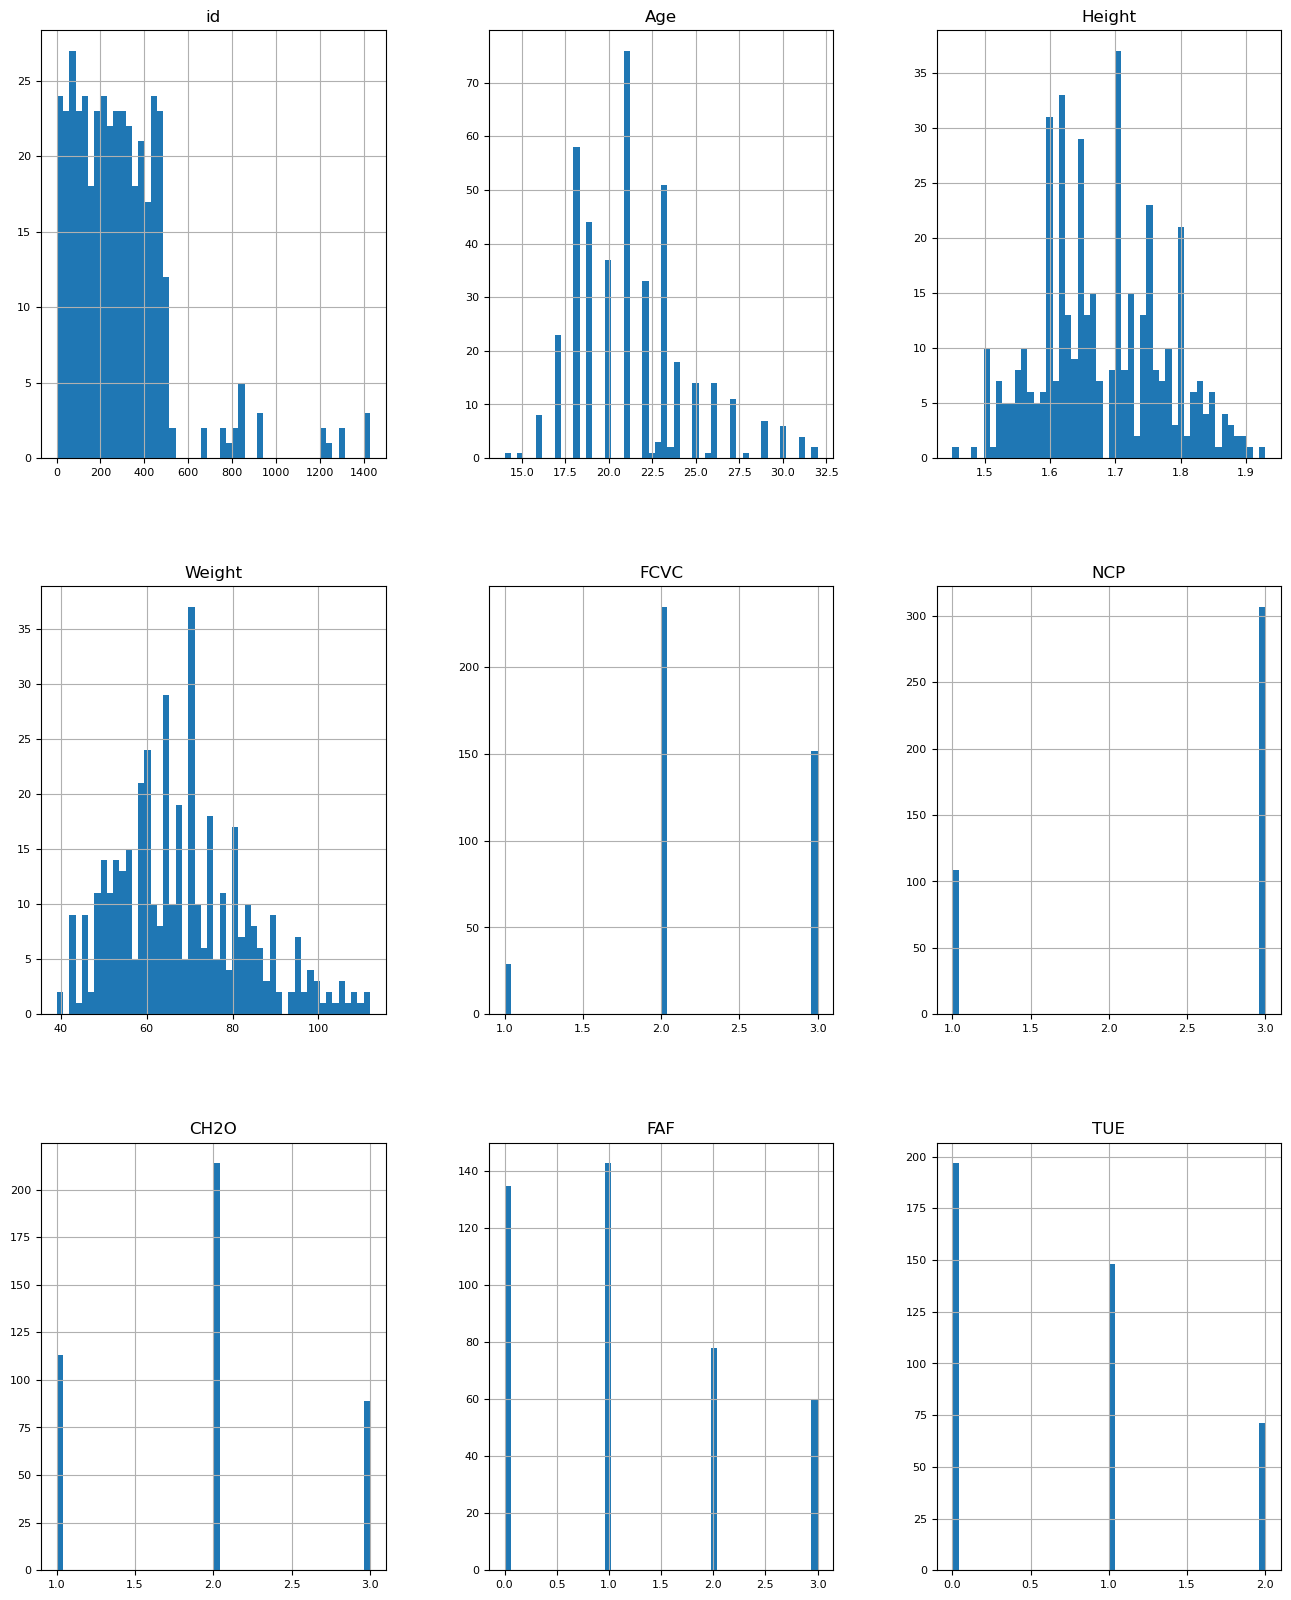

In [78]:
df_3_nooutliers_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [79]:
df_3_nooutliers_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 481
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      416 non-null    int64  
 1   Age     416 non-null    float64
 2   Height  416 non-null    float64
 3   Weight  416 non-null    float64
 4   FCVC    416 non-null    float64
 5   NCP     416 non-null    float64
 6   CH2O    416 non-null    float64
 7   FAF     416 non-null    float64
 8   TUE     416 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 32.5 KB


In [80]:
df_3_nooutliers_num.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,287.240385,21.320694,1.679560,68.108727,2.295673,2.475962,1.942308,1.151442,0.697115
std,229.354747,3.252224,0.093896,14.944287,0.590349,0.880525,0.695277,1.033720,0.744193
min,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,123.500000,19.000000,1.620000,57.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,258.000000,21.000000,1.670000,66.700000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,394.250000,23.000000,1.750000,78.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,1427.000000,32.000000,1.930000,112.000000,3.000000,3.000000,3.000000,3.000000,2.000000


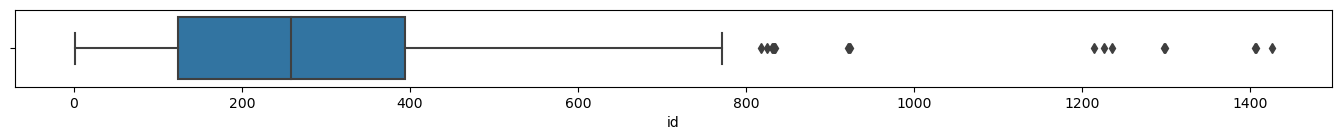

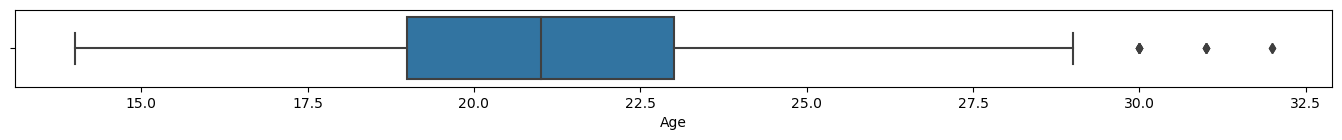

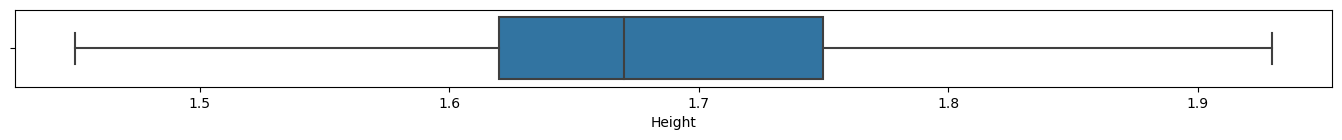

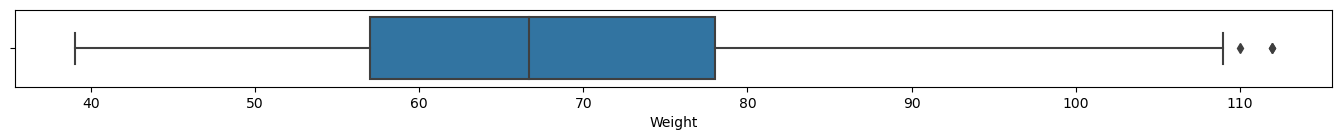

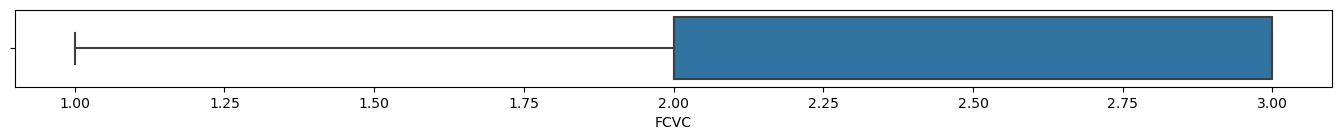

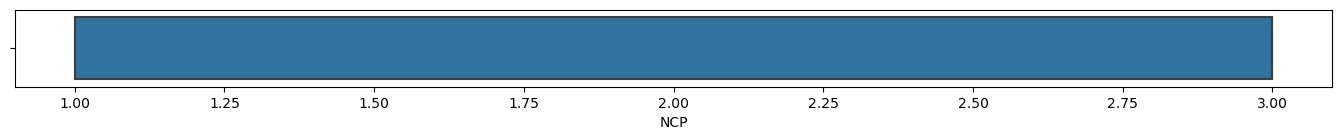

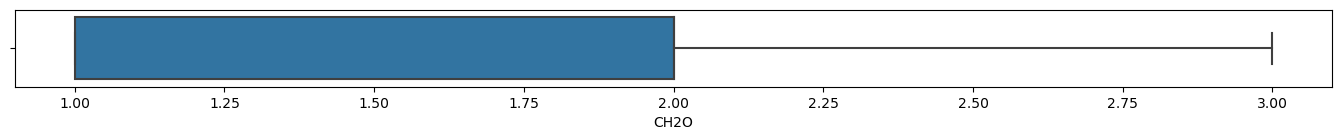

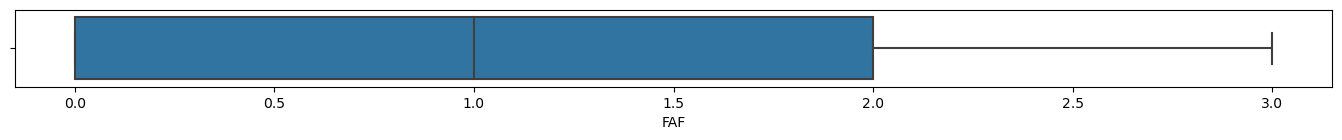

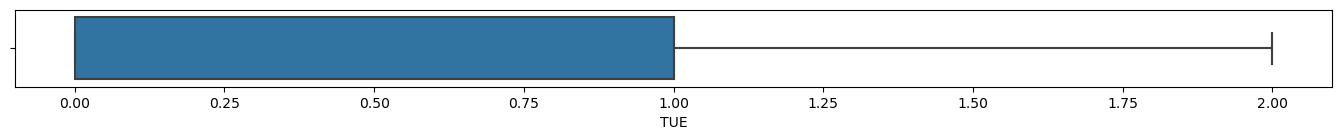

In [81]:
for column in df_3_nooutliers_num:
        plt.figure(figsize=(17,1))
        sns.boxplot(data= df_3_nooutliers_num, x=column)

In [82]:
df_3_num.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,297.385093,23.538901,1.681958,70.466685,2.306418,2.486542,1.937888,1.130435,0.658385
std,241.002937,7.103478,0.097234,17.240320,0.577321,0.874563,0.699936,1.027407,0.735346
min,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,137.500000,19.000000,1.615000,58.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,261.000000,21.000000,1.670000,69.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,398.000000,24.500000,1.750000,80.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,1440.000000,61.000000,1.980000,173.000000,3.000000,3.000000,3.000000,3.000000,2.000000


In [83]:
df_3_nooutliers_num.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,287.240385,21.320694,1.679560,68.108727,2.295673,2.475962,1.942308,1.151442,0.697115
std,229.354747,3.252224,0.093896,14.944287,0.590349,0.880525,0.695277,1.033720,0.744193
min,1.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,123.500000,19.000000,1.620000,57.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,258.000000,21.000000,1.670000,66.700000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,394.250000,23.000000,1.750000,78.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,1427.000000,32.000000,1.930000,112.000000,3.000000,3.000000,3.000000,3.000000,2.000000


- Now let's encode the categorical (norminal and ordinal) variables
- We will also fit the models with either df_3 or df_3_nooutliers
- Use metrics robust and meaningful( f1, recall, presicion, for small samples - unbalanced, in a category given the distribution of samples  across all categories)
- The response is unbalanced, hence we will employ SMOTE ( oversampling and undersampling techniques)

In [84]:
df_3['NObeyesdad'].value_counts() # target value distribution in preprocessed data set

Normal_Weight          258
Overweight_Level_I      65
Overweight_Level_II     59
Obesity_Type_I          58
Insufficient_Weight     30
Obesity_Type_II         10
Obesity_Type_III         3
Name: NObeyesdad, dtype: int64

In [85]:
df_3_nooutliers['NObeyesdad'].value_counts()

Normal_Weight          243
Overweight_Level_I      58
Obesity_Type_I          42
Overweight_Level_II     39
Insufficient_Weight     30
Obesity_Type_II          2
Obesity_Type_III         2
Name: NObeyesdad, dtype: int64

In [86]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 482
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              483 non-null    int64  
 1   Gender                          483 non-null    object 
 2   Age                             483 non-null    float64
 3   Height                          483 non-null    float64
 4   Weight                          483 non-null    float64
 5   family_history_with_overweight  483 non-null    object 
 6   FAVC                            483 non-null    object 
 7   CAEC                            483 non-null    object 
 8   SMOKE                           483 non-null    object 
 9   SCC                             483 non-null    object 
 10  CALC                            483 non-null    object 
 11  MTRANS                          483 non-null    object 
 12  NObeyesdad                      483 

In [87]:
df_3_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 481
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              416 non-null    int64  
 1   Gender                          416 non-null    object 
 2   Age                             416 non-null    float64
 3   Height                          416 non-null    float64
 4   Weight                          416 non-null    float64
 5   family_history_with_overweight  416 non-null    object 
 6   FAVC                            416 non-null    object 
 7   CAEC                            416 non-null    object 
 8   SMOKE                           416 non-null    object 
 9   SCC                             416 non-null    object 
 10  CALC                            416 non-null    object 
 11  MTRANS                          416 non-null    object 
 12  NObeyesdad                      416 

In [88]:
df_3_nooutliers.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE
0,1,Female,21.0,1.62,64.0,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,2.0,3.0,2.0,0.0,1.0
1,2,Female,21.0,1.52,56.0,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,3.0,3.0,3.0,3.0,0.0
2,3,Male,23.0,1.80,77.0,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,2.0,3.0,2.0,2.0,1.0
3,4,Male,27.0,1.80,87.0,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,3.0,3.0,2.0,2.0,0.0
4,5,Male,22.0,1.78,89.8,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,2.0,1.0,2.0,0.0,0.0


### Ordinal Encoding

In [89]:
## Ordinal Encoder - CAEC, CALC
df_3_nooutliers['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [90]:
calc = ['no', 'Sometimes', 'Frequently', 'Always']

In [91]:
df_3_nooutliers['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [92]:
caec = ['no', 'Sometimes', 'Frequently', 'Always']

In [93]:
from sklearn.preprocessing import OrdinalEncoder
o_enc = OrdinalEncoder(categories =[calc, caec])

In [94]:
o_enc.fit(df_3_nooutliers[["CAEC", "CALC"]])

OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always'],
                           ['no', 'Sometimes', 'Frequently', 'Always']])

In [95]:
df_3_nooutliers[["CAEC", "CALC"]] = o_enc.transform(df_3_nooutliers[["CAEC", "CALC"]])

In [96]:
df_3_nooutliers.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE
0,1,Female,21.0,1.62,64.0,yes,no,1.0,no,no,0.0,Public_Transportation,Normal_Weight,2.0,3.0,2.0,0.0,1.0
1,2,Female,21.0,1.52,56.0,yes,no,1.0,yes,yes,1.0,Public_Transportation,Normal_Weight,3.0,3.0,3.0,3.0,0.0
2,3,Male,23.0,1.80,77.0,yes,no,1.0,no,no,2.0,Public_Transportation,Normal_Weight,2.0,3.0,2.0,2.0,1.0
3,4,Male,27.0,1.80,87.0,no,no,1.0,no,no,2.0,Walking,Overweight_Level_I,3.0,3.0,2.0,2.0,0.0
4,5,Male,22.0,1.78,89.8,no,no,1.0,no,no,1.0,Public_Transportation,Overweight_Level_II,2.0,1.0,2.0,0.0,0.0


### Label Encoding

In [97]:
## Label Encoder on Target - NObeyesdad
df_3_nooutliers['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_III'], dtype=object)

In [98]:
#obese_state = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
#               'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 
#              'Obesity_Type_III']

In [99]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

In [100]:
l_enc.fit(df_3_nooutliers['NObeyesdad'])

LabelEncoder()

In [101]:
df_3_nooutliers['NObeyesdad'] = l_enc.transform(df_3_nooutliers['NObeyesdad'])

In [102]:
df_3_nooutliers

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE
0,1,Female,21.000000,1.620000,64.000000,yes,no,1.0,no,no,0.0,Public_Transportation,1,2.0,3.0,2.0,0.0,1.0
1,2,Female,21.000000,1.520000,56.000000,yes,no,1.0,yes,yes,1.0,Public_Transportation,1,3.0,3.0,3.0,3.0,0.0
2,3,Male,23.000000,1.800000,77.000000,yes,no,1.0,no,no,2.0,Public_Transportation,1,2.0,3.0,2.0,2.0,1.0
3,4,Male,27.000000,1.800000,87.000000,no,no,1.0,no,no,2.0,Walking,5,3.0,3.0,2.0,2.0,0.0
4,5,Male,22.000000,1.780000,89.800000,no,no,1.0,no,no,1.0,Public_Transportation,6,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1298,Male,22.771612,1.750384,95.324282,yes,yes,1.0,no,no,0.0,Public_Transportation,2,2.0,3.0,3.0,3.0,2.0
477,1299,Male,22.582371,1.753081,95.269089,yes,yes,1.0,no,no,0.0,Public_Transportation,2,2.0,3.0,3.0,3.0,2.0
479,1406,Male,23.324710,1.769484,96.078462,yes,yes,1.0,no,no,0.0,Public_Transportation,2,2.0,3.0,3.0,3.0,2.0
480,1407,Male,23.668137,1.777416,97.842406,yes,yes,1.0,no,no,0.0,Public_Transportation,2,2.0,3.0,3.0,3.0,2.0


In [103]:
print(l_enc.classes_)

['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [104]:
df_3_nooutliers['NObeyesdad'].value_counts()

1    243
5     58
2     42
6     39
0     30
3      2
4      2
Name: NObeyesdad, dtype: int64

### One Hot Encoding

In [105]:
## One Hot Encoder - family_history_with_overweight, FAVC, SMOKE, SCC, MTRANS, Gender

In [106]:
df_3_nooutliers['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [107]:
df_3_nooutliers['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [108]:
df_3_nooutliers['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [109]:
df_3_nooutliers['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [110]:
df_3_nooutliers['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [111]:
df_3_nooutliers['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [112]:
oh_enc_vars = ['FAVC', 'SMOKE', 'SCC', 'MTRANS', 'Gender', 'family_history_with_overweight']

In [113]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(sparse = False , drop = 'first') #to prevent the dummy variable trap of multicollinearity

In [114]:
oh_enc.fit_transform(df_3_nooutliers[oh_enc_vars])

/Users/mnsiahnimo/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [115]:
df_3_nooutliers_ohe_array = oh_enc.fit_transform(df_3_nooutliers[oh_enc_vars])

/Users/mnsiahnimo/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [116]:
df_3_nooutliers_ohe_names = oh_enc.get_feature_names_out(oh_enc_vars)

In [117]:
df_3_nooutliers_ohe_names

array(['FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'Gender_Male',
       'family_history_with_overweight_yes'], dtype=object)

In [118]:
encoder_vars_df = pd.DataFrame(df_3_nooutliers_ohe_array, columns = df_3_nooutliers_ohe_names)

In [119]:
df3_noout_new = pd.concat([df_3_nooutliers.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

In [120]:
df3_noout_new.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,...,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
0,1,Female,21.0,1.62,64.0,yes,no,1.0,no,no,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Female,21.0,1.52,56.0,yes,no,1.0,yes,yes,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,Male,23.0,1.80,77.0,yes,no,1.0,no,no,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,4,Male,27.0,1.80,87.0,no,no,1.0,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,Male,22.0,1.78,89.8,no,no,1.0,no,no,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [121]:
df3_noout_new.shape

(416, 27)

In [122]:
df3_noout_new.drop(oh_enc_vars, axis = 1, inplace = True)

In [123]:
df3_noout_new.shape

(416, 21)

In [124]:
df3_noout_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  416 non-null    int64  
 1   Age                                 416 non-null    float64
 2   Height                              416 non-null    float64
 3   Weight                              416 non-null    float64
 4   CAEC                                416 non-null    float64
 5   CALC                                416 non-null    float64
 6   NObeyesdad                          416 non-null    int64  
 7   FCVC                                416 non-null    float64
 8   NCP                                 416 non-null    float64
 9   CH2O                                416 non-null    float64
 10  FAF                                 416 non-null    float64
 11  TUE                                 416 non-n

In [125]:
df3_noout_new.head()

,id,Age,Height,Weight,CAEC,CALC,NObeyesdad,FCVC,NCP,CH2O,...,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
0,1,21.0,1.62,64.0,1.0,0.0,1,2.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,21.0,1.52,56.0,1.0,1.0,1,3.0,3.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,23.0,1.80,77.0,1.0,2.0,1,2.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,4,27.0,1.80,87.0,1.0,2.0,5,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,22.0,1.78,89.8,1.0,1.0,6,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [126]:
pd.set_option('display.max_columns', None)
df3_noout_new.head()

,id,Age,Height,Weight,CAEC,CALC,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
0,1,21.0,1.62,64.0,1.0,0.0,1,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,21.0,1.52,56.0,1.0,1.0,1,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,23.0,1.80,77.0,1.0,2.0,1,2.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,4,27.0,1.80,87.0,1.0,2.0,5,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,22.0,1.78,89.8,1.0,1.0,6,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [127]:
df3_noout_new.describe()

,id,Age,Height,Weight,CAEC,CALC,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,287.240385,21.320694,1.679560,68.108727,1.348558,0.730769,2.079327,2.295673,2.475962,1.942308,1.151442,0.697115,0.737981,0.048077,0.105769,0.014423,0.019231,0.730769,0.108173,0.545673,0.596154
std,229.354747,3.252224,0.093896,14.944287,0.741960,0.612807,1.911526,0.590349,0.880525,0.695277,1.033720,0.744193,0.440263,0.214186,0.307912,0.119370,0.137501,0.444094,0.310973,0.498509,0.491258
min,1.000000,14.000000,1.450000,39.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.500000,19.000000,1.620000,57.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,258.000000,21.000000,1.670000,66.700000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,394.250000,23.000000,1.750000,78.000000,2.000000,1.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1427.000000,32.000000,1.930000,112.000000,3.000000,3.000000,6.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
df3_noout_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  416 non-null    int64  
 1   Age                                 416 non-null    float64
 2   Height                              416 non-null    float64
 3   Weight                              416 non-null    float64
 4   CAEC                                416 non-null    float64
 5   CALC                                416 non-null    float64
 6   NObeyesdad                          416 non-null    int64  
 7   FCVC                                416 non-null    float64
 8   NCP                                 416 non-null    float64
 9   CH2O                                416 non-null    float64
 10  FAF                                 416 non-null    float64
 11  TUE                                 416 non-n

In [129]:
#convert Dtypes into appropriate format
#Remove id
#Define X's and y
#Train , Test Split
#Build First Classification Model.
#Check out imbalanced classes and mertics of presicion and recall

In [130]:
df3_noout_dropid = df3_noout_new.drop(columns= ['id'], axis = 1)

In [131]:
df3_noout_dropid.head()

,Age,Height,Weight,CAEC,CALC,NObeyesdad,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
0,21.0,1.62,64.0,1.0,0.0,1,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21.0,1.52,56.0,1.0,1.0,1,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,23.0,1.80,77.0,1.0,2.0,1,2.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,27.0,1.80,87.0,1.0,2.0,5,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,22.0,1.78,89.8,1.0,1.0,6,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [132]:
df3_noout_dropid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 416 non-null    float64
 1   Height                              416 non-null    float64
 2   Weight                              416 non-null    float64
 3   CAEC                                416 non-null    float64
 4   CALC                                416 non-null    float64
 5   NObeyesdad                          416 non-null    int64  
 6   FCVC                                416 non-null    float64
 7   NCP                                 416 non-null    float64
 8   CH2O                                416 non-null    float64
 9   FAF                                 416 non-null    float64
 10  TUE                                 416 non-null    float64
 11  FAVC_yes                            416 non-n

#### Except for Age, Height and Weight which are numeric attributes, convert all other variables to the object class (category type) 

In [133]:
# convert data to the required types
#df3_noout_dropid['model_year'] = df3_noout_dropid['model_year'].astype('int64')
#df3_noout_dropid['cylinders'] = df3_noout_dropid['cylinders'].astype('int64')
#df3_noout_dropid['odometer'] = df3_noout_dropid['odometer'].astype('int64')
#df3_noout_dropid['is_4wd'] = df3_noout_dropid['is_4wd'].astype('int64')

df3_noout_dropid.columns

Index(['Age', 'Height', 'Weight', 'CAEC', 'CALC', 'NObeyesdad', 'FCVC', 'NCP',
       'CH2O', 'FAF', 'TUE', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'Gender_Male', 'family_history_with_overweight_yes'],
      dtype='object')

In [134]:
for col in ['CAEC', 'CALC', 'NObeyesdad', 'FCVC', 'NCP',
           'CH2O', 'FAF', 'TUE', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike',
           'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
           'Gender_Male', 'family_history_with_overweight_yes']:
    df3_noout_dropid[col] = df3_noout_dropid[col].astype('category')

In [135]:
df3_noout_dropid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 416 non-null    float64 
 1   Height                              416 non-null    float64 
 2   Weight                              416 non-null    float64 
 3   CAEC                                416 non-null    category
 4   CALC                                416 non-null    category
 5   NObeyesdad                          416 non-null    category
 6   FCVC                                416 non-null    category
 7   NCP                                 416 non-null    category
 8   CH2O                                416 non-null    category
 9   FAF                                 416 non-null    category
 10  TUE                                 416 non-null    category
 11  FAVC_yes                        

#### Split data into X(features) and y(target)

In [136]:
# Feature, target arrays
X, y = df3_noout_dropid.drop('NObeyesdad', axis=1), df3_noout_dropid['NObeyesdad']

In [137]:
X.head()

,Age,Height,Weight,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21.0,1.52,56.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,23.0,1.80,77.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,27.0,1.80,87.0,1.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,22.0,1.78,89.8,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [138]:
y

0      1
1      1
2      1
3      5
4      6
      ..
411    2
412    2
413    2
414    2
415    2
Name: NObeyesdad, Length: 416, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

####  Feature Engineering - Create BMI from Height and Weight

In [139]:
X["BMI"] = X["Weight"] / (X['Height']**2)
X["BMI"] = X["BMI"].round(2)
X.head()

,Age,Height,Weight,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes,BMI
0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,24.39
1,21.0,1.52,56.0,1.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,24.24
2,23.0,1.80,77.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,23.77
3,27.0,1.80,87.0,1.0,2.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,26.85
4,22.0,1.78,89.8,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28.34


In [140]:
# Drop Height and Weight now
X = X.drop(['Weight', 'Height'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 416 non-null    float64 
 1   CAEC                                416 non-null    category
 2   CALC                                416 non-null    category
 3   FCVC                                416 non-null    category
 4   NCP                                 416 non-null    category
 5   CH2O                                416 non-null    category
 6   FAF                                 416 non-null    category
 7   TUE                                 416 non-null    category
 8   FAVC_yes                            416 non-null    category
 9   SMOKE_yes                           416 non-null    category
 10  SCC_yes                             416 non-null    category
 11  MTRANS_Bike                     

#### Data Preprocessing

- Now that we have clean data - removed outliers, encoded categorical input features and output labels,  engineered some features( create BMI from Height and Weight for improvement in predictive performance) , let's split (train and test) our data and perform some data preprocessing i.e. scale some input features.

#### Split Data into Train and Test Examples

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0, stratify =y)

In [142]:
X_train.head()

,Age,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes,BMI
367,19.0,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.71
154,26.0,2.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,26.12
221,25.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.53
63,23.0,1.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,16.94
32,21.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,26.89


In [143]:
y_train.head()

367    0
154    5
221    1
63     0
32     5
Name: NObeyesdad, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [144]:
X_train.describe()

,Age,BMI
count,332.000000,332.000000
mean,21.379886,24.053072
std,3.315495,4.355324
min,14.000000,15.820000
25%,19.000000,20.982500
50%,21.000000,23.570000
75%,23.000000,26.670000
max,32.000000,41.910000


In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 367 to 413
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 332 non-null    float64 
 1   CAEC                                332 non-null    category
 2   CALC                                332 non-null    category
 3   FCVC                                332 non-null    category
 4   NCP                                 332 non-null    category
 5   CH2O                                332 non-null    category
 6   FAF                                 332 non-null    category
 7   TUE                                 332 non-null    category
 8   FAVC_yes                            332 non-null    category
 9   SMOKE_yes                           332 non-null    category
 10  SCC_yes                             332 non-null    category
 11  MTRANS_Bike                   

### Feature Scaling On Training Data

In [146]:
# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale, LabelEncoder, OneHotEncoder


In [147]:
#Scaling is implemented only on numeric features
scaler = StandardScaler()
X_train[['Age', 'BMI']] = scaler.fit_transform(X_train[['Age', 'BMI']])
X_train_scaled = X_train
X_train_scaled.head()

,Age,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes,BMI
367,-0.718891,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.458593
154,1.395595,2.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.475291
221,1.093526,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.120281
63,0.489387,1.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.635655
32,-0.114752,1.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.652353


In [148]:
scaler = StandardScaler()
X_test[['Age', 'BMI']] = scaler.fit_transform(X_test[['Age', 'BMI']])
X_test_scaled = X_test
X_test_scaled.head()

,Age,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes,BMI
278,-0.029125,3.0,0.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.958380
384,0.978123,0.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.817888
55,0.642374,3.0,2.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.559145
53,-0.029125,2.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.551798
252,-1.707872,1.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.386520


In [149]:
X_test_scaled.shape

(84, 18)

In [150]:
y_train.shape

(332,)

In [151]:
X_train.shape

(332, 18)

In [152]:
y_train.value_counts()

1    194
5     46
2     33
6     31
0     24
3      2
4      2
Name: NObeyesdad, dtype: int64

In [153]:
y.value_counts()

1    243
5     58
2     42
6     39
0     30
3      2
4      2
Name: NObeyesdad, dtype: int64

In [154]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 367 to 413
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 332 non-null    float64 
 1   CAEC                                332 non-null    category
 2   CALC                                332 non-null    category
 3   FCVC                                332 non-null    category
 4   NCP                                 332 non-null    category
 5   CH2O                                332 non-null    category
 6   FAF                                 332 non-null    category
 7   TUE                                 332 non-null    category
 8   FAVC_yes                            332 non-null    category
 9   SMOKE_yes                           332 non-null    category
 10  SCC_yes                             332 non-null    category
 11  MTRANS_Bike                   

#### Balance Data Set Using SMOTE on Training Set

In [155]:
#conda install -c conda-forge imbalanced-learn
cat_features = X_train_scaled.iloc[:, np.r_[1:16]].columns.values

In [157]:
cat_features

array(['CAEC', 'CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Male'],
      dtype=object)

In [159]:
cat_features = X_train_scaled[['CAEC', 'CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Male']]

In [160]:
cat_features

,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
367,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154,2.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
221,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,1.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
32,1.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,1.0,1.0,3.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
392,2.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
399,0.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
364,2.0,0.0,3.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [171]:
cat_features.describe()

,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male
count,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0,332.0
unique,4.0,4.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
freq,196.0,186.0,196.0,237.0,180.0,118.0,160.0,244.0,316.0,300.0,326.0,326.0,244.0,296.0,182.0


In [168]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 332 entries, 367 to 413
Series name: NObeyesdad
Non-Null Count  Dtype   
--------------  -----   
332 non-null    category
dtypes: category(1)
memory usage: 3.3 KB


In [158]:
print(len(cat_features))

15


In [177]:
#USE SMOTENC to accommodate for oversampling with categorical features
from imblearn.over_sampling import SMOTENC

oversample = SMOTENC([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], random_state = 42, k_neighbors= 1)
X_train_res, y_train_res = oversample.fit_resample(X_train_scaled, y_train)

In [178]:
y_train_res.value_counts() 

0    194
1    194
2    194
3    194
4    194
5    194
6    194
Name: NObeyesdad, dtype: int64

In [179]:
X_train_res.head()

,Age,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes,BMI
0,-0.718891,1.0,0.0,3.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.458593
1,1.395595,2.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.475291
2,1.093526,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.120281
3,0.489387,1.0,0.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.635655
4,-0.114752,1.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.652353


In [180]:
X_train_res.shape

(1358, 18)

In [181]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 1358 non-null   float64 
 1   CAEC                                1358 non-null   category
 2   CALC                                1358 non-null   category
 3   FCVC                                1358 non-null   category
 4   NCP                                 1358 non-null   category
 5   CH2O                                1358 non-null   category
 6   FAF                                 1358 non-null   category
 7   TUE                                 1358 non-null   category
 8   FAVC_yes                            1358 non-null   category
 9   SMOKE_yes                           1358 non-null   category
 10  SCC_yes                             1358 non-null   category
 11  MTRANS_Bike                   

In [182]:
y_train_res.shape

(1358,)

In [183]:
X_train_res.describe(include='category')

,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes
count,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0,1358.0
unique,4.0,4.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,2.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
freq,859.0,719.0,611.0,929.0,607.0,825.0,700.0,1029.0,1133.0,1192.0,1350.0,1352.0,971.0,1267.0,695.0,991.0


- Note: Do not perform oversampling( USING SMOTE) on test data

In [184]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 278 to 19
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 84 non-null     float64 
 1   CAEC                                84 non-null     category
 2   CALC                                84 non-null     category
 3   FCVC                                84 non-null     category
 4   NCP                                 84 non-null     category
 5   CH2O                                84 non-null     category
 6   FAF                                 84 non-null     category
 7   TUE                                 84 non-null     category
 8   FAVC_yes                            84 non-null     category
 9   SMOKE_yes                           84 non-null     category
 10  SCC_yes                             84 non-null     category
 11  MTRANS_Bike                     

#### Modelling

In [185]:
#conda install -c conda-forge xgboost

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/mnsiahnimo/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2023.5.7   |       h8857fd0_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    libxgboost-1.7.4           |   cpu_h0c1cf5f_0         1.5 MB  conda-forge
    openssl-1.1.1u             |       h8a1eda9_0         1.7 MB  conda-forge

In [186]:
#conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/mnsiahnimo/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.3.5             |  py310h879db79_0         1.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/osx-64::lightgbm-3.3.5-py310h879db79_0 



                                                                                
Preparing tran

In [187]:
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')


# Data processing and analysis
import numpy as np
import pandas as pd
import math 
import re


# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno


# Configure visualisations
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)


# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb


# Data preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, scale, LabelEncoder, OneHotEncoder


# Modeling helper functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score,recall_score,f1_score 

In [198]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM", 
         "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "LDA", "QDA", "Neural Net", "LightGBM"]  #"XGBoost"  

In [193]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier()    
    #xgb.XGBClassifier()
   ]

In [194]:
accuracy_scores = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train_res, y_train_res)
    score = clf.score(X_test_scaled, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.7619
Nearest Neighbors  :  0.4762
Naive Bayes  :  0.4405
Linear SVM  :  0.6905
RBF SVM  :  0.631
Gaussian Process  :  0.7381
Decision Tree  :  0.9643
Random Forest  :  0.881
AdaBoost  :  0.75
Gradient Boosting  :  0.9643
LDA  :  0.7024
QDA  :  0.0
Neural Net  :  0.7738
LightGBM  :  0.9643


In [199]:
classifiers_performance = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores})
classifiers_performance

,Classifiers,Accuracy Scores
0,Logistic Regression,0.7619
1,Nearest Neighbors,0.4762
2,Naive Bayes,0.4405
3,Linear SVM,0.6905
4,RBF SVM,0.6310
5,Gaussian Process,0.7381
6,Decision Tree,0.9643
7,Random Forest,0.8810
8,AdaBoost,0.7500
9,Gradient Boosting,0.9643


In [200]:
classifiers_performance.sort_values(by = 'Accuracy Scores' , ascending = False)[['Classifiers', 'Accuracy Scores']]

,Classifiers,Accuracy Scores
6,Decision Tree,0.9643
9,Gradient Boosting,0.9643
13,LightGBM,0.9643
7,Random Forest,0.8810
12,Neural Net,0.7738
0,Logistic Regression,0.7619
8,AdaBoost,0.7500
5,Gaussian Process,0.7381
10,LDA,0.7024
3,Linear SVM,0.6905


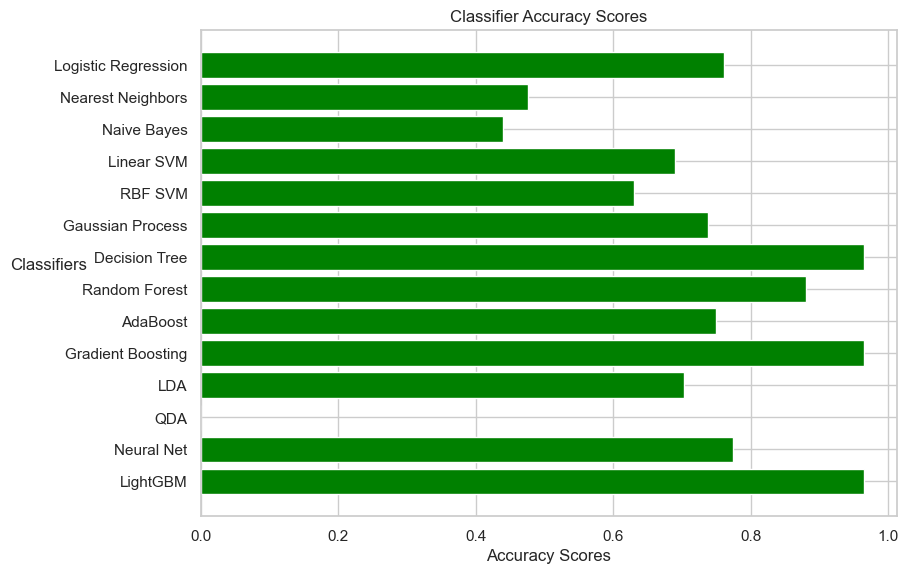

In [201]:
fig, ax = plt.subplots(figsize=(8,6))
x = classifiers_performance['Accuracy Scores']
y_ax = classifiers_performance['Classifiers']
ax.barh(y_ax, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy Scores')
ax.set_ylabel('Classifiers', rotation=0)
ax.set_title('Classifier Accuracy Scores')
plt.show()

#### Feature selection Using Random Forest Classifier and  Feature Importance Using Train Set

In [202]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the classifier to the training set
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=0)

In [203]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train_res.columns).sort_values(ascending=False)
feature_scores

BMI                                   0.426325
Age                                   0.109741
CAEC                                  0.061480
FCVC                                  0.060895
TUE                                   0.052481
FAF                                   0.039297
CH2O                                  0.038012
family_history_with_overweight_yes    0.036972
CALC                                  0.034234
NCP                                   0.029723
Gender_Male                           0.025433
SMOKE_yes                             0.024329
FAVC_yes                              0.019311
SCC_yes                               0.018228
MTRANS_Public_Transportation          0.015565
MTRANS_Walking                        0.006630
MTRANS_Bike                           0.000931
MTRANS_Motorbike                      0.000414
dtype: float64

In [204]:
feature_scores.values

array([4.26324880e-01, 1.09740722e-01, 6.14795186e-02, 6.08954859e-02,
       5.24807815e-02, 3.92965961e-02, 3.80115777e-02, 3.69724528e-02,
       3.42335041e-02, 2.97229533e-02, 2.54325172e-02, 2.43289799e-02,
       1.93113264e-02, 1.82284957e-02, 1.55650436e-02, 6.62981625e-03,
       9.30902742e-04, 4.14446331e-04])

In [205]:
feature_scores.index

Index(['BMI', 'Age', 'CAEC', 'FCVC', 'TUE', 'FAF', 'CH2O',
       'family_history_with_overweight_yes', 'CALC', 'NCP', 'Gender_Male',
       'SMOKE_yes', 'FAVC_yes', 'SCC_yes', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'MTRANS_Bike', 'MTRANS_Motorbike'],
      dtype='object')

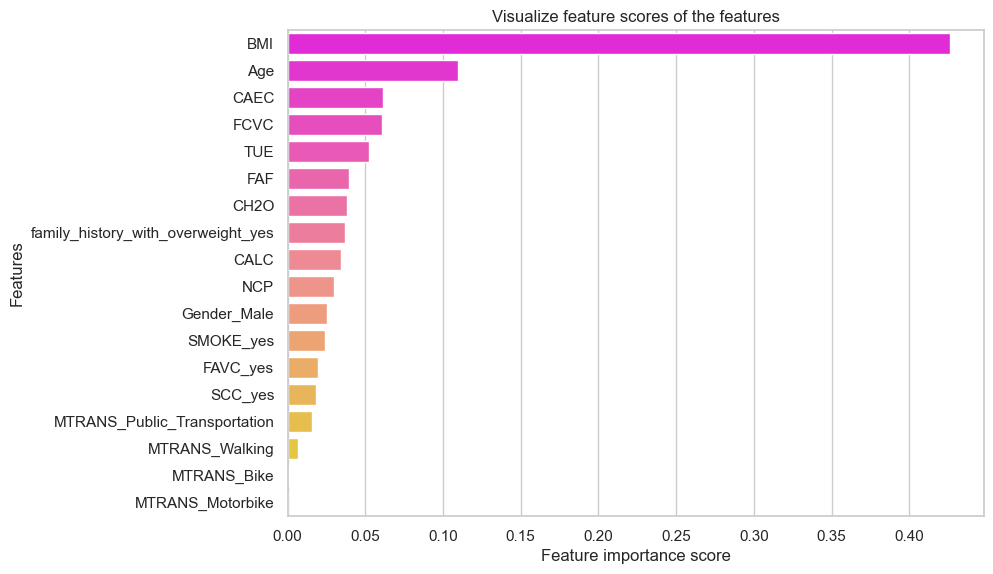

In [206]:
# Creating a seaborn bar plot to visualize feature scores
f, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=feature_scores.values, y=feature_scores.index, palette='spring')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [208]:
#conda install -c conda-forge shap


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/mnsiahnimo/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.41.0                |  py310h3099161_0         593 KB  conda-forge
    slicer-0.0.7               |     pyhd8ed1ab_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         610 KB

The following NEW packages will be INSTALLED:

  shap               conda-forge/osx-64::shap-0.41.0-py310h3099161_0 
  slicer             conda-

### Using SHAP for feature selection

In [209]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [210]:
#Get shap values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_scaled)

In [211]:
X_test_scaled.head()

,Age,CAEC,CALC,FCVC,NCP,CH2O,FAF,TUE,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Gender_Male,family_history_with_overweight_yes,BMI
278,-0.029125,3.0,0.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.958380
384,0.978123,0.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.817888
55,0.642374,3.0,2.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.559145
53,-0.029125,2.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.551798
252,-1.707872,1.0,0.0,3.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.386520


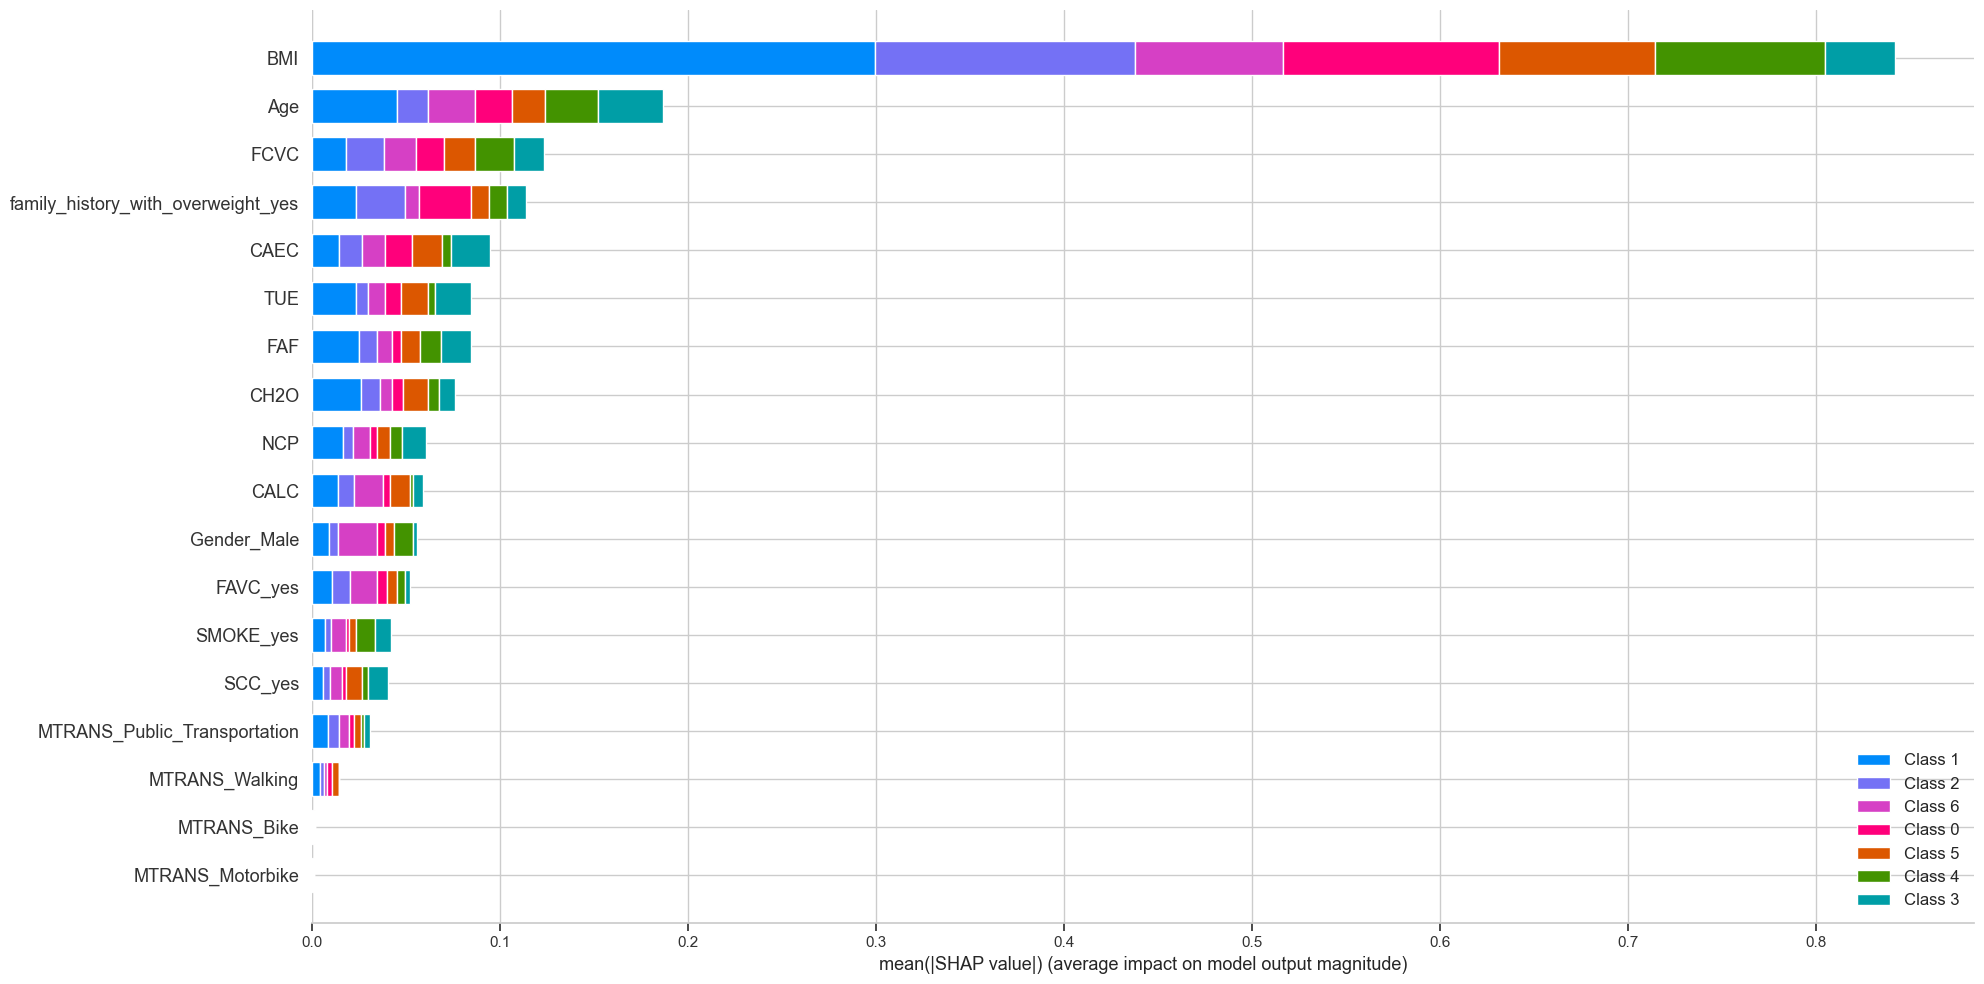

In [212]:
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X_test_scaled.columns , plot_size=[20,10])

- BMI, Smoking status, Age, CAEC, CALC contributes much towards predicting the classes of estimated obesity levels.

 - With these features from SHAP and Random Forest Selected, we would explore the data further with some questions
 - What is the ditribution of the classes of obesity across the levels of the most predictive features BMI, Smking status, age, CAEC, CALC, gender (subgroup)
 - Explore the associations and correlations ( statistical significance ) between the response measure (obesity levels) and these named features above
 

In [214]:
X_train_res.describe()

,Age,BMI
count,1358.000000,1358.000000
mean,0.470452,1.204691
std,1.084392,1.804654
min,-2.229238,-1.893200
25%,-0.297316,-0.085788
50%,0.489387,0.906237
75%,1.395595,2.999602
max,3.208011,4.106212


<Axes: xlabel='NObeyesdad', ylabel='BMI'>

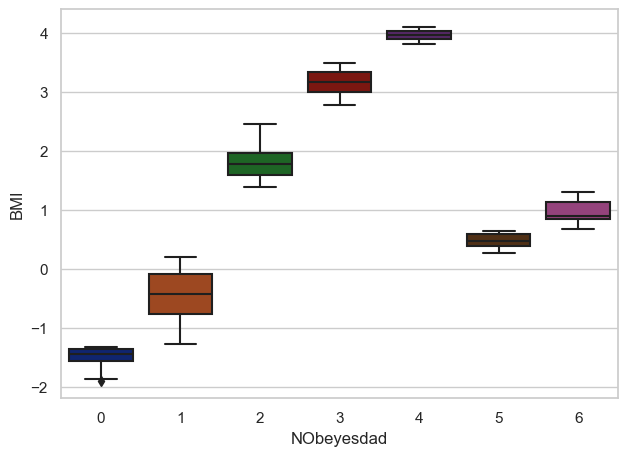

In [215]:
import seaborn as sns
sns.boxplot(y=X_train_res['BMI'], x=y_train_res)


In [217]:
#sns.barplot(y=X_train_res['SMOKE_yes'], x=y_train_res)

#### RFE and CV Feature Selction with Gradient Boosting using oversampled (SMOTE) train set

In [218]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [219]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=gbc_clf, step=1, cv=5, min_features_to_select=5, scoring='accuracy')
rfecv = rfecv.fit(X_train_res, y_train_res)

In [220]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 5


In [221]:
#transform the training data
X_train_res_rfecv = rfecv.transform(X_train_res)

#train classifier
gbc_clf.fit(X_train_res_rfecv, y_train_res)

GradientBoostingClassifier()

In [222]:
print("Num Features Before:", X_train_res.shape[1])
print("Num Features After:", X_train_res_rfecv.shape[1])

Num Features Before: 18
Num Features After: 5


In [223]:
features_kept = pd.DataFrame({'columns': X_train_res.columns,
                             'Kept': rfecv.support_})
features_kept

,columns,Kept
0,Age,True
1,CAEC,False
2,CALC,False
3,FCVC,False
4,NCP,False
5,CH2O,False
6,FAF,False
7,TUE,False
8,FAVC_yes,False
9,SMOKE_yes,False


In [224]:
rfecv.feature_names_in_

array(['Age', 'CAEC', 'CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'FAVC_yes', 'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'Gender_Male',
       'family_history_with_overweight_yes', 'BMI'], dtype=object)

In [225]:
rfecv.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True])

In [226]:

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train_res.columns[rfecv.support_])
print('Original features :', X_train_res.columns)


Optimal number of features : 5
Best features : Index(['Age', 'MTRANS_Public_Transportation', 'Gender_Male',
       'family_history_with_overweight_yes', 'BMI'],
      dtype='object')
Original features : Index(['Age', 'CAEC', 'CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Male',
       'family_history_with_overweight_yes', 'BMI'],
      dtype='object')


In [227]:
#import matplotlib.pyplot as plt

#n_scores = len(rfecv.cv_results_["mean_test_score"])
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Mean test accuracy")
#plt.errorbar(
#    range(1, n_scores + 1),
#    rfecv.cv_results_["mean_test_score"],
#    yerr=rfecv.cv_results_["std_test_score"],
##\)
#plt.title("Recursive Feature Elimination \nwith correlated features")
#plt.show()

In [228]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test_scaled)
y_pred_rfecv = gbc_clf.predict(X_test_rfecv)

In [229]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(gbc_clf.score(X_test_rfecv,y_test)))

Classifier score: 0.9643


In [230]:
rfecv.estimator_.feature_importances_ 

array([ 1.85409242e-15,  2.57975622e-17, -1.58403553e-17,  9.44246752e-17,
        1.00000000e+00])

In [231]:
X_train_res_new_df = X_train_res.iloc[:, rfecv.support_]
X_train_res_new_df.head()


,Age,MTRANS_Public_Transportation,Gender_Male,family_history_with_overweight_yes,BMI
0,-0.718891,1.0,0.0,0.0,-1.458593
1,1.395595,1.0,1.0,1.0,0.475291
2,1.093526,1.0,0.0,0.0,-0.120281
3,0.489387,1.0,0.0,1.0,-1.635655
4,-0.114752,1.0,0.0,1.0,0.652353


In [232]:
from sklearn.feature_selection import RFECV

rfecv_1 = RFECV(estimator=gbc_clf, step=1, cv=5, scoring='accuracy')
rfecv_1 = rfecv_1.fit(X_train_res, y_train_res)

In [233]:
print("Optimal number of features : %d" % rfecv_1.n_features_)

Optimal number of features : 1


In [234]:
#transform the inputs of the training data
X_train_res_rfecv_1 = rfecv_1.transform(X_train_res)

#train classifier
gbc_clf.fit(X_train_res_rfecv_1, y_train_res)

GradientBoostingClassifier()

In [235]:
print("Num Features Before:", X_train_res.shape[1])
print("Num Features After:", X_train_res_rfecv_1.shape[1])

Num Features Before: 18
Num Features After: 1


In [236]:
features_kept_1 = pd.DataFrame({'columns': X_train_res.columns,
                             'Kept': rfecv_1.support_})
features_kept_1

,columns,Kept
0,Age,False
1,CAEC,False
2,CALC,False
3,FCVC,False
4,NCP,False
5,CH2O,False
6,FAF,False
7,TUE,False
8,FAVC_yes,False
9,SMOKE_yes,False


In [238]:
"""import matplotlib.pyplot as plt

n_scores = len(rfecv_1.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv_1.cv_results_["mean_test_score"],
    yerr=rfecv_1.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()
"""

'import matplotlib.pyplot as plt\n\nn_scores = len(rfecv_1.cv_results_["mean_test_score"])\nplt.figure()\nplt.xlabel("Number of features selected")\nplt.ylabel("Mean test accuracy")\nplt.errorbar(\n    range(1, n_scores + 1),\n    rfecv_1.cv_results_["mean_test_score"],\n    yerr=rfecv_1.cv_results_["std_test_score"],\n)\nplt.title("Recursive Feature Elimination \nwith correlated features")\nplt.show()\n'

In [239]:
# test classifier on test data

X_test_rfecv_1 = rfecv_1.transform(X_test_scaled)
y_pred_rfecv_1 = gbc_clf.predict(X_test_rfecv_1)

In [240]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(gbc_clf.score(X_test_rfecv_1,y_test)))

Classifier score: 0.9643


In [241]:
rfecv_1.estimator_.feature_importances_ 

array([1.])

#### From the two methods of feature selection , we will pick 
##### CAEC, CALC, SMOKE_yes, BMI and Age

In [242]:
X_train_res_new_df.head()

,Age,MTRANS_Public_Transportation,Gender_Male,family_history_with_overweight_yes,BMI
0,-0.718891,1.0,0.0,0.0,-1.458593
1,1.395595,1.0,1.0,1.0,0.475291
2,1.093526,1.0,0.0,0.0,-0.120281
3,0.489387,1.0,0.0,1.0,-1.635655
4,-0.114752,1.0,0.0,1.0,0.652353


In [243]:
X_train_res_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 1358 non-null   float64 
 1   MTRANS_Public_Transportation        1358 non-null   category
 2   Gender_Male                         1358 non-null   category
 3   family_history_with_overweight_yes  1358 non-null   category
 4   BMI                                 1358 non-null   float64 
dtypes: category(3), float64(2)
memory usage: 25.7 KB


In [244]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train_res_new_df, y_train_res)

GradientBoostingClassifier()

In [245]:
# select the same features on the test set
X_test_new_df = X_test_scaled.iloc[:, rfecv.support_]
X_test_new_df.head()


,Age,MTRANS_Public_Transportation,Gender_Male,family_history_with_overweight_yes,BMI
278,-0.029125,1.0,0.0,1.0,-0.958380
384,0.978123,1.0,1.0,0.0,0.817888
55,0.642374,0.0,1.0,1.0,2.559145
53,-0.029125,1.0,0.0,1.0,0.551798
252,-1.707872,1.0,0.0,0.0,-0.386520


In [246]:
score = gbc_clf.score(X_test_new_df, y_test)
score = round(score, 4)
score

0.9643

#### Refit Classifiers with Selected Features , Predict and Obtain Accuracy Scores on Test set

In [250]:
names = ["Logistic Regression", "Nearest Neighbors", "Naive Bayes", "Linear SVM", "RBF SVM", 
         "Gaussian Process", "Decision Tree", "Random Forest", "AdaBoost", "Gradient Boosting", 
         "LDA", "QDA", "Neural Net", "LightGBM", ] #"XGBoost" ] 

In [251]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    SVC(kernel = "rbf", gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier()   
    #xgb.XGBClassifier()
   ]

In [252]:
accuracy_scores1 = []

# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train_res_new_df, y_train_res)
    score = clf.score(X_test_new_df, y_test)
    score = round(score, 4)
    accuracy_scores1.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8571
Nearest Neighbors  :  0.7976
Naive Bayes  :  0.8929
Linear SVM  :  0.6429
RBF SVM  :  0.8333
Gaussian Process  :  0.9524
Decision Tree  :  0.9643
Random Forest  :  0.9167
AdaBoost  :  0.75
Gradient Boosting  :  0.9643
LDA  :  0.6786
QDA  :  0.0
Neural Net  :  0.9048
LightGBM  :  0.9524


In [253]:
classifiers_performance1 = pd.DataFrame({"Classifiers": names, "Accuracy Scores": accuracy_scores, 
                                         "Accuracy Scores1": accuracy_scores1})
classifiers_performance1

,Classifiers,Accuracy Scores,Accuracy Scores1
0,Logistic Regression,0.7619,0.8571
1,Nearest Neighbors,0.4762,0.7976
2,Naive Bayes,0.4405,0.8929
3,Linear SVM,0.6905,0.6429
4,RBF SVM,0.6310,0.8333
5,Gaussian Process,0.7381,0.9524
6,Decision Tree,0.9643,0.9643
7,Random Forest,0.8810,0.9167
8,AdaBoost,0.7500,0.7500
9,Gradient Boosting,0.9643,0.9643


- To increase accuracy
- To reduce High Variance 
- I obtained more training examples by oversampling on the minority class using SMOTE
- I reduced the feature space by using a smaller set of features yet obtaining the same classification accuracy
- I combined weight and height into BMI (Feature Engineering)
- I implemented Feature Scaling on Age and BMI variables in the training set

In [254]:
y_train_res.value_counts()

0    194
1    194
2    194
3    194
4    194
5    194
6    194
Name: NObeyesdad, dtype: int64

In [255]:
# fit the model
gbc_clf.fit(X_train_res, y_train_res)

# prediction for Training data
train_pred = gbc_clf.predict(X_train_res)

# prediction for Testing data
test_pred = gbc_clf.predict(X_test_scaled)

In [256]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train_res))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.9642857142857143


In [257]:
# fit the model
gbc_clf.fit(X_train_res_new_df, y_train_res)

# prediction for Training data
train_pred_sm = gbc_clf.predict(X_train_res_new_df)

# prediction for Testing data
test_pred_sm = gbc_clf.predict(X_test_new_df)

In [258]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_res))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.9642857142857143


In [259]:
y_test.value_counts()

1    49
5    12
2     9
6     8
0     6
3     0
4     0
Name: NObeyesdad, dtype: int64

In [260]:
print(classification_report(y_test, test_pred_sm))
print('--------------------------------------------------------')
print("")

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.98      1.00      0.99        49
           2       0.90      1.00      0.95         9
           5       1.00      0.92      0.96        12
           6       0.88      0.88      0.88         8

    accuracy                           0.96        84
   macro avg       0.95      0.93      0.94        84
weighted avg       0.97      0.96      0.96        84

--------------------------------------------------------



In [261]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 416 non-null    float64 
 1   CAEC                                416 non-null    category
 2   CALC                                416 non-null    category
 3   FCVC                                416 non-null    category
 4   NCP                                 416 non-null    category
 5   CH2O                                416 non-null    category
 6   FAF                                 416 non-null    category
 7   TUE                                 416 non-null    category
 8   FAVC_yes                            416 non-null    category
 9   SMOKE_yes                           416 non-null    category
 10  SCC_yes                             416 non-null    category
 11  MTRANS_Bike                     

#### Checking ccuracy with cross validation to avoid overfitting using cross_val_score on X and y 

##### Using Gradient Boosting Classifier 

In [262]:
from sklearn.model_selection import cross_val_score
scores_v = cross_val_score(gbc_clf, X, y, scoring="accuracy", cv=5 )
scores_v

array([0.96428571, 0.98795181, 0.97590361, 0.97590361, 1.        ])

In [263]:
scores_v.mean()

0.9808089500860586

In [264]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = KFold(shuffle=True, n_splits=5)

cv_results_kfold = cross_val_score(gbc_clf, X, y, cv = kf, scoring='accuracy')

print(cv_results_kfold)

[0.98809524 0.98795181 0.98795181 0.98795181 0.98795181]


In [265]:
cv_results_kfold.mean()

0.9879804934021801

In [266]:
# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5)

cv_results_skfold = cross_val_score(gbc_clf, X, y, cv = skf, scoring='accuracy')

print(cv_results_skfold)

[0.97619048 0.98795181 0.98795181 0.98795181 1.        ]


In [267]:
cv_results_skfold .mean()

0.9880091795754445

##### Using LGB Classifier

In [268]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train_res_new_df, y_train_res)

LGBMClassifier()

In [269]:
from sklearn.model_selection import cross_val_score
scores_l = cross_val_score(lgb_clf, X, y, scoring="accuracy", cv=5 )
scores_l

array([0.95238095, 0.98795181, 0.97590361, 0.96385542, 0.97590361])

In [270]:
scores_l.mean()

0.9711990820424555

In [271]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = KFold(shuffle=True, n_splits=5)

cv_results_kfold = cross_val_score(lgb_clf, X, y, cv = kf, scoring='accuracy')

print(cv_results_kfold)

[0.97619048 0.97590361 0.98795181 0.98795181 0.98795181]


In [272]:
cv_results_kfold.mean()

0.983189902467011

In [273]:
# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5)

cv_results_skfold = cross_val_score(lgb_clf, X, y, cv = skf, scoring='accuracy')

print(cv_results_skfold)

[0.98809524 1.         0.97590361 0.98795181 0.95180723]


In [274]:
cv_results_skfold .mean()

0.9807515777395295

### Model Checking and Evaluation using Cross Validation
#### Use cross_val_score on oversampled (implementing SMOTE) and balanced training data with selected and reduced number of features

In [275]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = KFold(shuffle=True, n_splits=5,random_state = 42)

cv_results_kfold = cross_val_score(gbc_clf, X_train_res_new_df, y_train_res,cv = kf, scoring='accuracy')

print(cv_results_kfold)

[1. 1. 1. 1. 1.]


In [276]:
cv_results_kfold.mean()

1.0

In [277]:
# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5, random_state = 42)

cv_results_skfold = cross_val_score(gbc_clf, X_train_res_new_df, y_train_res, cv = skf, scoring='accuracy')

print(cv_results_skfold)

[1. 1. 1. 1. 1.]


In [278]:
cv_results_skfold .mean()

1.0

In [279]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kf = KFold(shuffle=True, n_splits=5,random_state = 42)

cv_results_kfold = cross_val_score(lgb_clf, X_train_res_new_df, y_train_res,cv = kf, scoring='accuracy')

print(cv_results_kfold)

[0.99632353 1.         0.99264706 1.         0.99630996]


In [280]:
cv_results_kfold.mean()

0.9970561102669852

In [281]:
# Stratified K fold

skf = StratifiedKFold(shuffle=True, n_splits=5, random_state = 42)

cv_results_skfold = cross_val_score(lgb_clf, X_train_res_new_df, y_train_res, cv = skf, scoring='accuracy')

print(cv_results_skfold)

[0.99632353 0.98897059 0.99632353 1.         0.99630996]


In [282]:
cv_results_skfold .mean()

0.9955855220316909

- Results do show that 5 fold Cross Validation with Gradient Boosting has results in slightly better performace over LGB algorithm ( with default hyperparameters)

In [283]:
from sklearn import datasets, metrics, model_selection
import seaborn as sn
import pandas as pd

#ROC-AUC plot
#Accuracy_keras = accuracy_score(test_pred_sm, y_test, normalize = True) 
#Accuracy_df.append(Accuracy_keras)
#svc_disp = metrics.plot_roc_curve(gbc_clf, X_test_new_df, y_test, color='red')
#plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#col="ROC-AUC"
#plt.title(col)
#plt.savefig(f'{col}_ROC.jpeg', dpi = 300, bbox_inches = "tight")

#Confusion matrix for test samples
yt_pred = gbc_clf.predict(X_test_new_df)
Accuracy_keras = accuracy_score(y_test, yt_pred, normalize = True)
print(confusion_matrix(y_test,yt_pred))
print(classification_report(y_test,yt_pred))

[[ 5  1  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 11  1]
 [ 0  0  1  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.98      1.00      0.99        49
           2       0.90      1.00      0.95         9
           5       1.00      0.92      0.96        12
           6       0.88      0.88      0.88         8

    accuracy                           0.96        84
   macro avg       0.95      0.93      0.94        84
weighted avg       0.97      0.96      0.96        84



- Eventually our selected model is the Gradient Boosting Classifier